In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Shopee Task.csv')

#EDA

## Check for duplicate

In [ ]:
print(df.shape)
print(df['user_id'].nunique())

(222378, 38)
222378


They are all unique

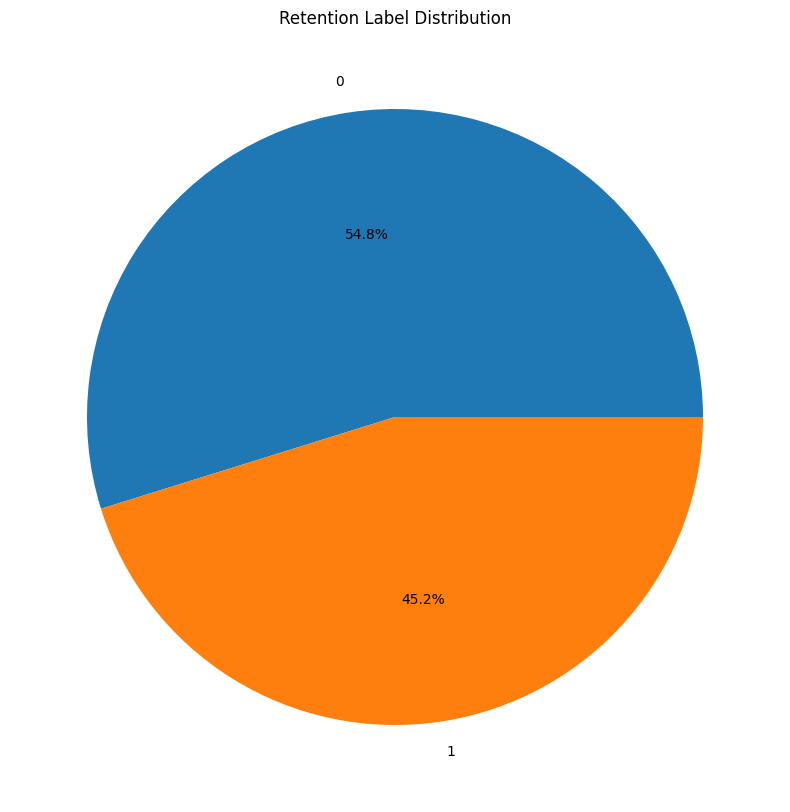

In [ ]:
label_pie = df.groupby('label')['user_id'].count().sort_values(ascending=False)
plt.figure(figsize=(12,10))
plt.pie(label_pie, labels=label_pie.index, autopct='%1.1f%%')
plt.title('Retention Label Distribution')
plt.show()

##Age vs Churn

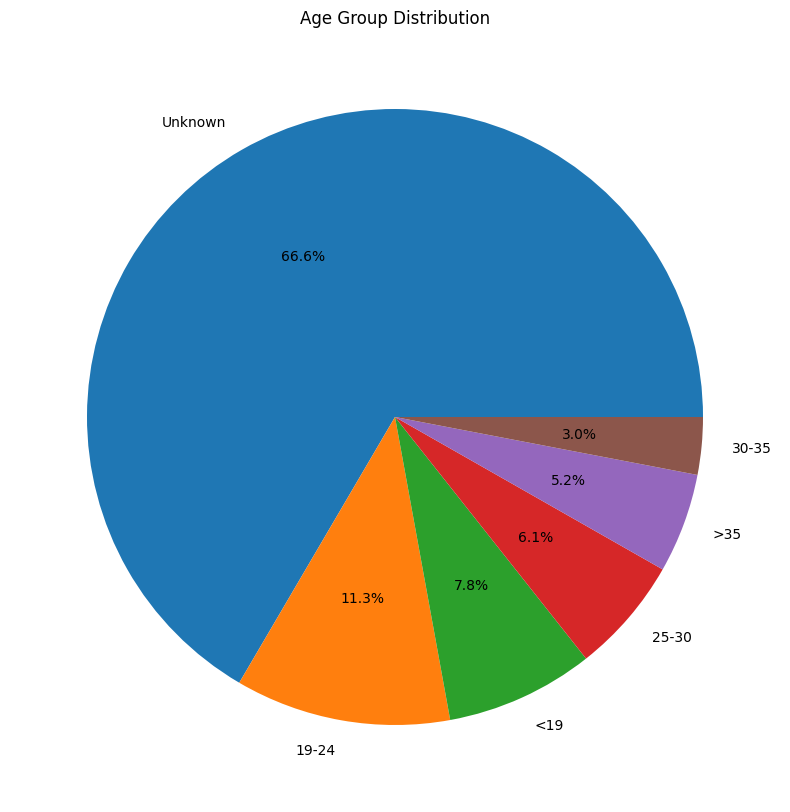

In [ ]:
age_pie = df.groupby('age_group')['user_id'].count().sort_values(ascending=False)
plt.figure(figsize=(12,10))
plt.pie(age_pie, labels=age_pie.index, autopct='%1.1f%%')
plt.title('Age Group Distribution')
plt.show()

Most are unknown

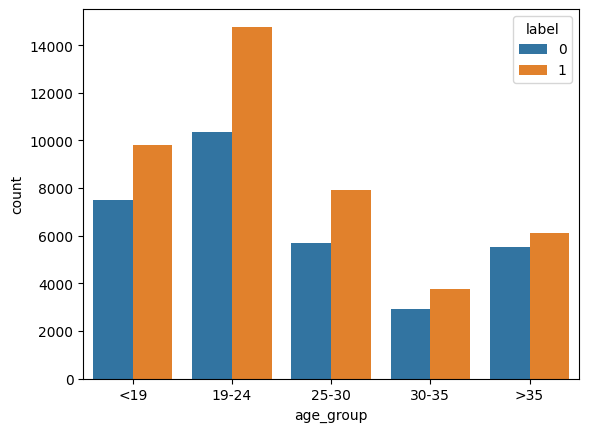

In [ ]:
age_group_order = ['<19', '19-24', '25-30', '30-35', '>35']
sns.countplot(x='age_group', hue='label', data=df, order=age_group_order)
plt.show()


19-24 Age Group is likelier to be retained

But generally retained

##Gender vs Churn

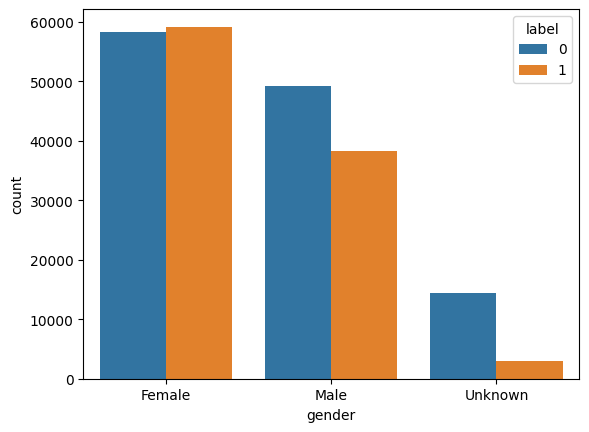

In [ ]:
sns.countplot(x='gender',hue='label', data=df)
plt.show()

Female has better retention rate

##Region vs Churn

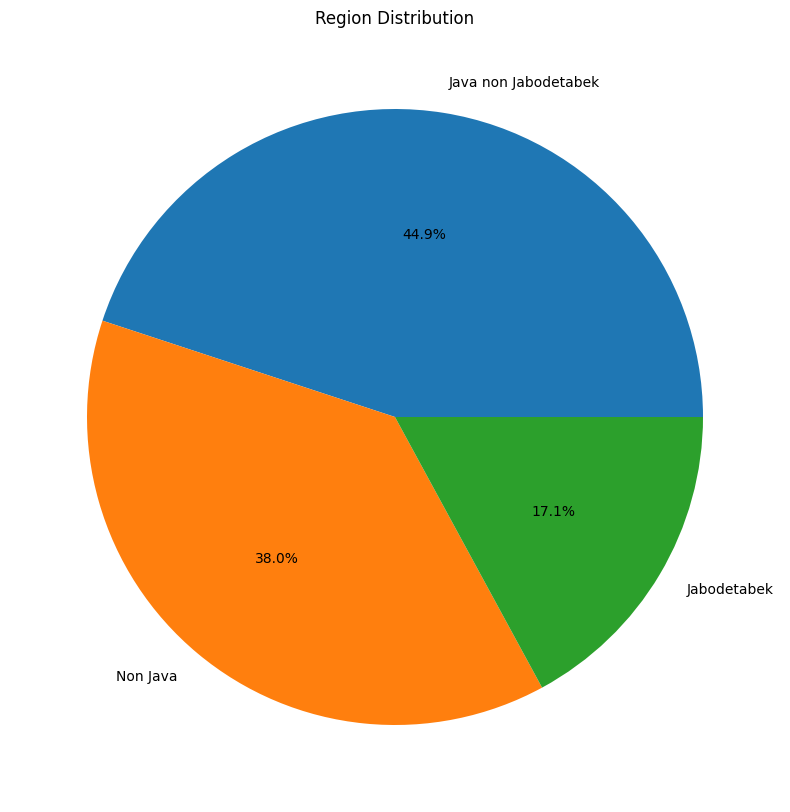

In [ ]:
region = df.groupby('region')['user_id'].count().sort_values(ascending=False)
plt.figure(figsize=(12,10))
plt.pie(region, labels=region.index, autopct='%1.1f%%')
plt.title('Region Distribution')
plt.show()


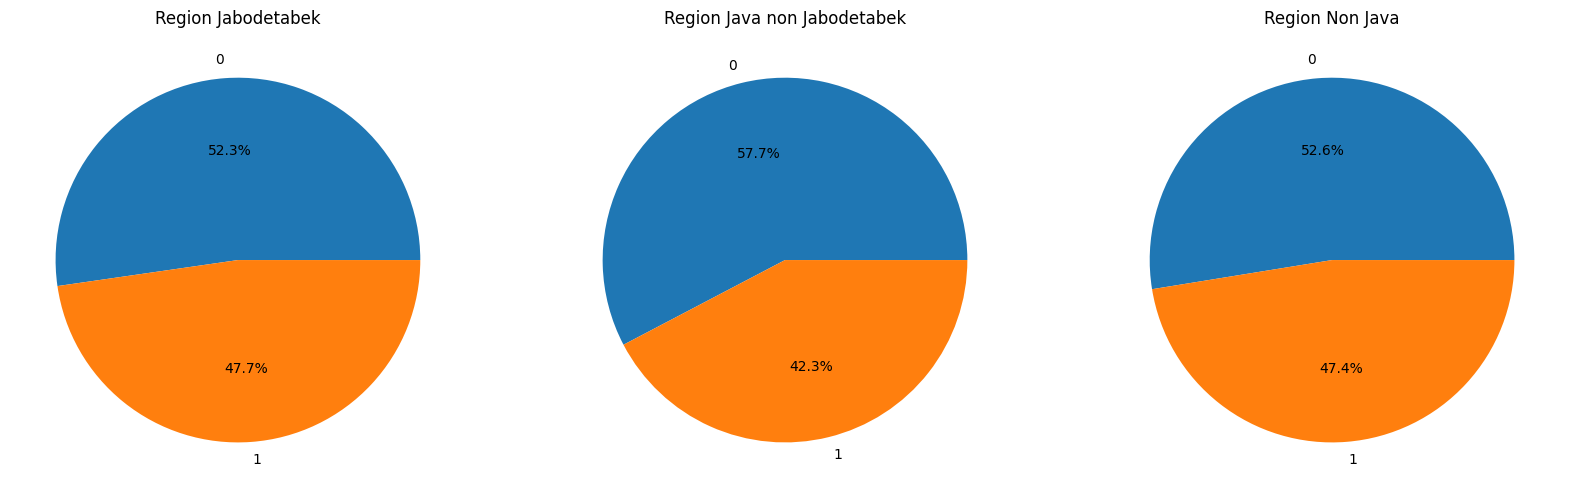

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

for i, region in enumerate(df['region'].unique()):
  region_df = df[df['region'] == region]
  region_counts = region_df['label'].value_counts()
  axes[i].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
  axes[i].set_title(f'Region {region}')
plt.show()


## Rural or Urban

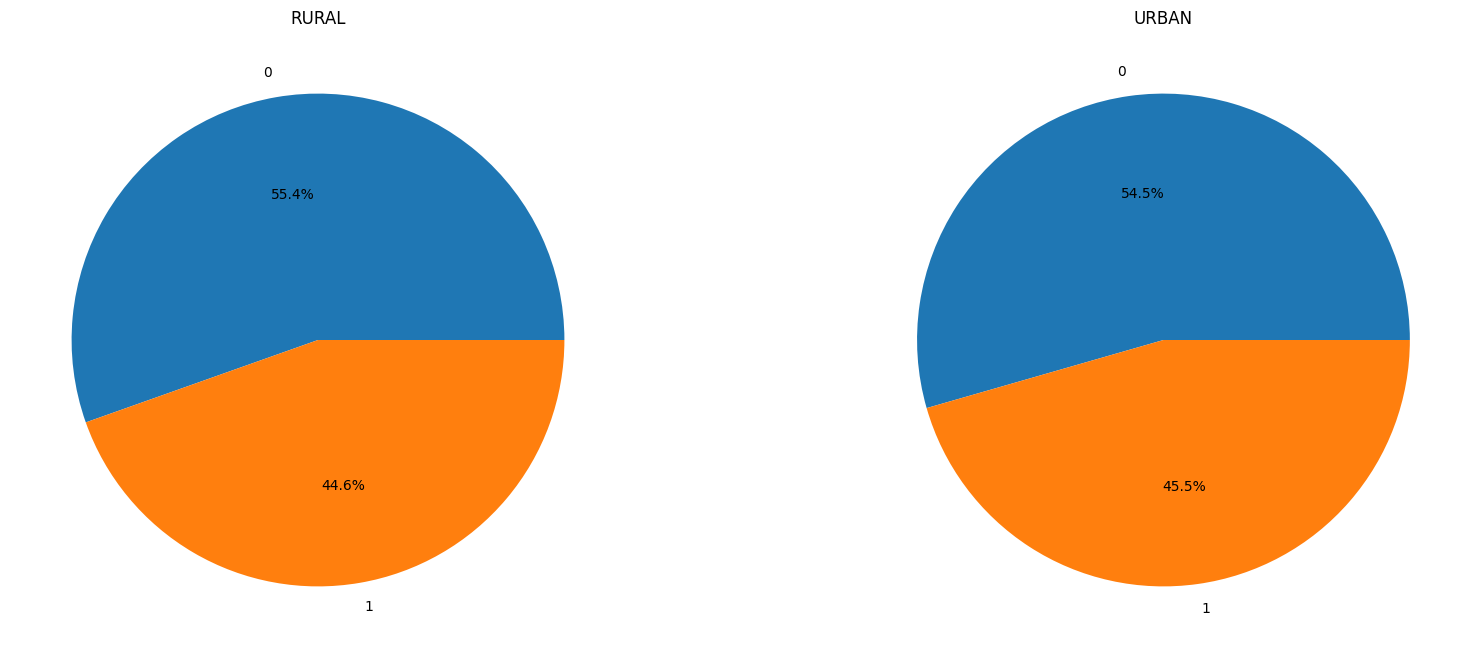

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

for i, region in enumerate(df['is_rural_or_urban'].unique()):
  region_df = df[df['is_rural_or_urban'] == region]
  region_counts = region_df['label'].value_counts()
  axes[i].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
  axes[i].set_title(f'{region}')

plt.show()

Both sectors are not retained

## Buyer Status vs Churn

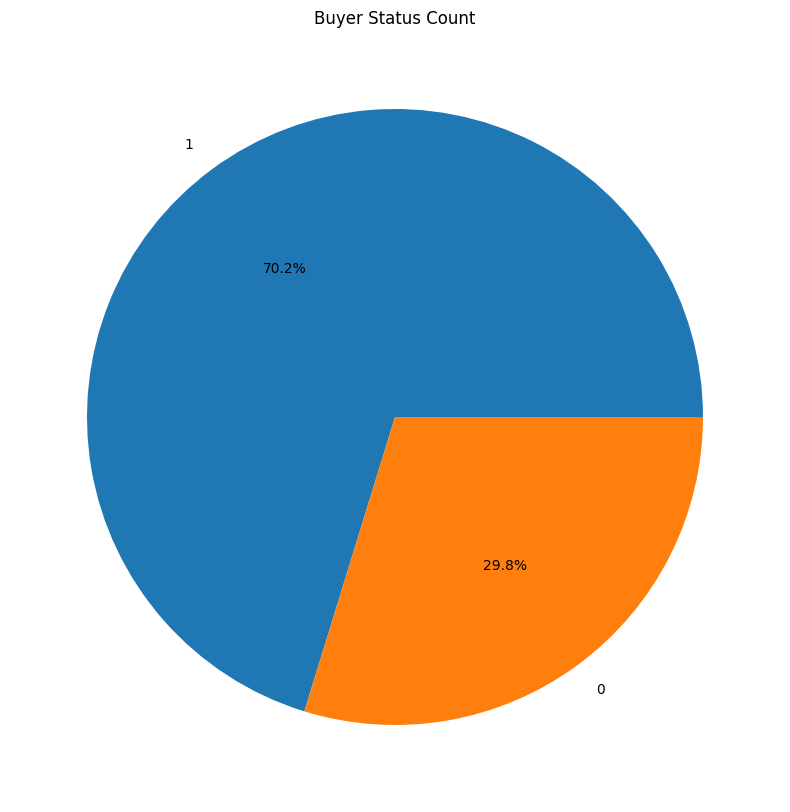

In [ ]:
buyer_status = df.groupby('is_buyer_14d')['user_id'].count().sort_values(ascending=False)
plt.figure(figsize=(12,10))
plt.pie(buyer_status, labels=buyer_status.index, autopct='%1.1f%%')
plt.title('Buyer Status Count')
plt.show()

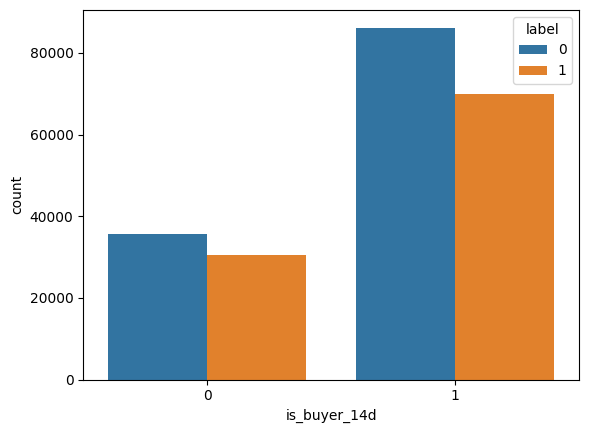

In [ ]:
sns.countplot(x='is_buyer_14d', hue='label', data=df)
plt.show()

Buyers are not retained

## New Buyer Initiative vs Churn

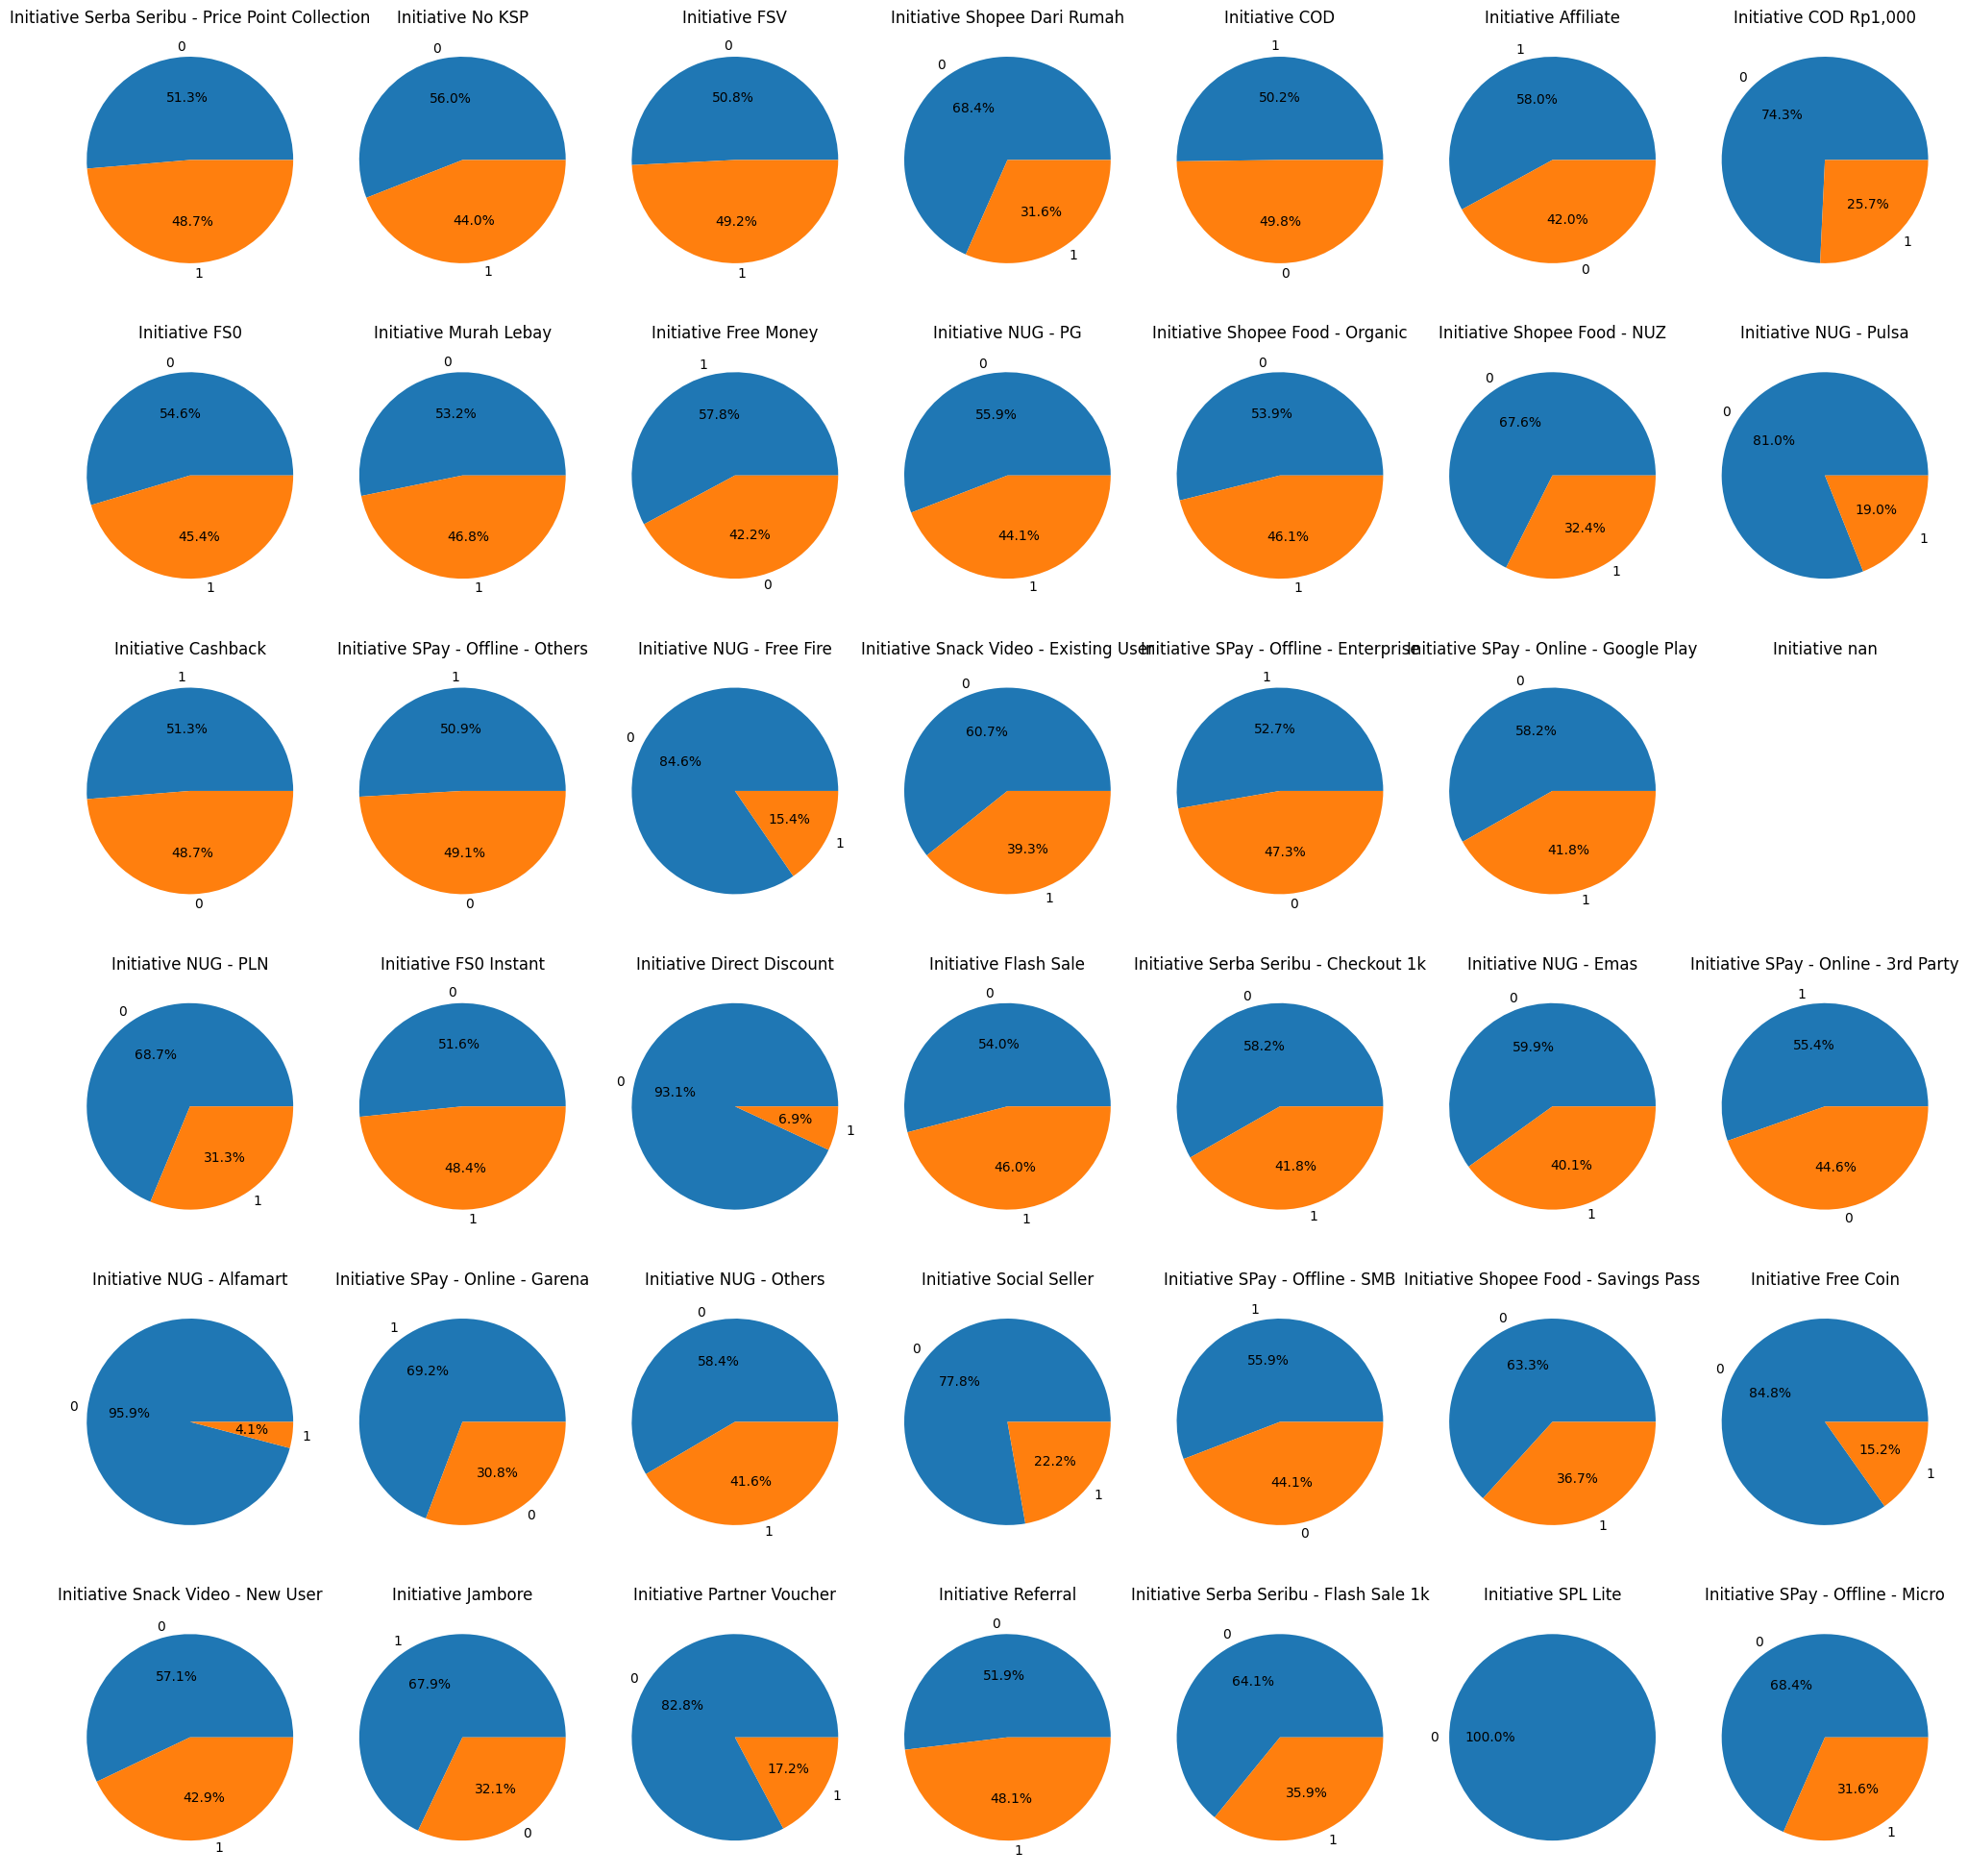

In [ ]:
fig, axes = plt.subplots(6, 7, figsize=(20, 20))

for i, initiative in enumerate(df['new_buyer_initiative'].unique()):
  initiative_df = df[df['new_buyer_initiative'] == initiative]
  initiative_counts = initiative_df['label'].value_counts()
  row = i // 7
  col = i % 7
  axes[row, col].pie(initiative_counts, labels=initiative_counts.index, autopct='%1.1f%%') # Access the correct subplot using row and col indices
  axes[row, col].set_title(f'Initiative {initiative}')
plt.tight_layout()
plt.show()


There are some NaN new_buyer_initiative

In [ ]:
df['new_buyer_initiative'].isna().sum()

378

Can be dropped since the number is insignificant

In [ ]:
df = df.dropna(subset=['new_buyer_initiative'])

In [ ]:
df['new_buyer_initiative'].isna().sum()

0

In [ ]:
initiative_retention = df.groupby('new_buyer_initiative')['label'].mean().sort_values(ascending=False)
print(initiative_retention)

new_buyer_initiative
SPay - Online - Garena                   0.692308
Jambore                                  0.679245
Affiliate                                0.579598
Free Money                               0.578386
SPay - Offline - SMB                     0.558559
SPay - Online - 3rd Party                0.554084
SPay - Offline - Enterprise              0.527216
Cashback                                 0.512652
SPay - Offline - Others                  0.508982
COD                                      0.502121
FSV                                      0.492171
Serba Seribu - Price Point Collection    0.486663
FS0 Instant                              0.483871
Referral                                 0.480769
Murah Lebay                              0.468168
Shopee Food - Organic                    0.461045
Flash Sale                               0.459716
FS0                                      0.453582
NUG - PG                                 0.441318
No KSP                       

SPay - Online - Garena is the most successful campaign

## Shopeepay Activation vs Churn

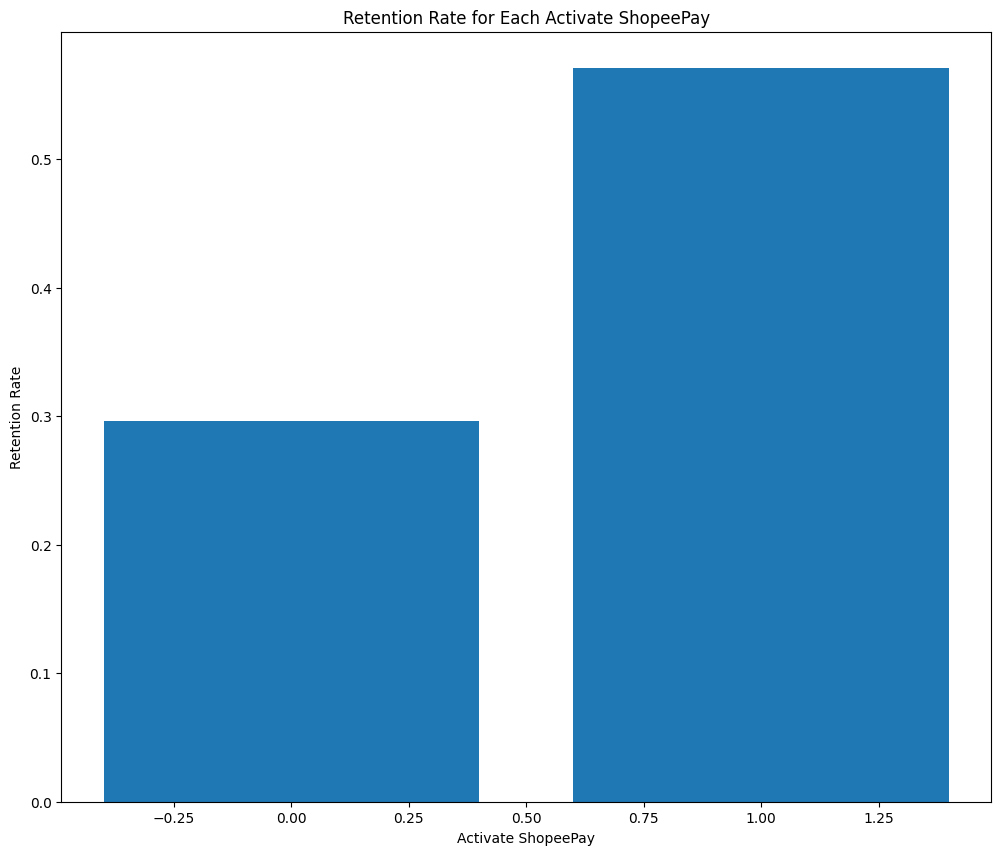

In [ ]:
activate_shopeepay_retention = df.groupby('activate_shopeepay')['label'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,10))
plt.bar(activate_shopeepay_retention.index, activate_shopeepay_retention.values)
plt.title('Retention Rate for Each Activate ShopeePay')
plt.xlabel('Activate ShopeePay')
plt.ylabel('Retention Rate')
plt.show()


Retention significantly more likely after activating shopeepay

#Label Encoding

Encoding categorical labels so it can be fed into the model as a feature

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
le_region = LabelEncoder()
le_is_rural_or_urban = LabelEncoder()
le_new_buyer_initiative = LabelEncoder()
le_age_group = LabelEncoder()
df['age_group'] = le_age_group.fit_transform(df['age_group']) #ordinal
df = pd.get_dummies(df, columns=['gender'], prefix='gender')  #categorical
df = pd.get_dummies(df, columns=['region'], prefix='region') #categorical
df = pd.get_dummies(df, columns=['is_rural_or_urban'], prefix='is_rural_or_urban') #categorical
df = pd.get_dummies(df, columns=['new_buyer_initiative'], prefix='new_buyer_initiative') #categorical

In [ ]:
df

,user_id,regist_date,age_group,is_buyer_14d,is_dp_buyer_14d,label,total_voucher_claim_14d,total_order_14d,gmv_14d,pdp_views_14d,shop_views_14d,total_login_days_l14d,total_login_sessions_l14d,time_spent_platform_14d,avg_time_per_session_14d,use_shopeepay,use_shopeepaylater,use_cod,use_va_bt,use_cc_debit,use_instant,use_sameday,use_nextday,use_regular,use_hemat,shop_mall,shop_ss_plus,shop_ss,shop_cb,shop_sbs,shop_normal_shop,shop_flash_sale,activate_shopeepay,top_up_14d,gender_Female,gender_Male,gender_Unknown,region_Jabodetabek,region_Java non Jabodetabek,region_Non Java,is_rural_or_urban_RURAL,is_rural_or_urban_URBAN,new_buyer_initiative_Affiliate,new_buyer_initiative_COD,"new_buyer_initiative_COD Rp1,000",new_buyer_initiative_Cashback,new_buyer_initiative_Direct Discount,new_buyer_initiative_FS0,new_buyer_initiative_FS0 Instant,new_buyer_initiative_FSV,new_buyer_initiative_Flash Sale,new_buyer_initiative_Free Coin,new_buyer_initiative_Free Money,new_buyer_initiative_Jambore,new_buyer_initiative_Murah Lebay,new_buyer_initiative_NUG - Alfamart,new_buyer_initiative_NUG - Emas,new_buyer_initiative_NUG - Free Fire,new_buyer_initiative_NUG - Others,new_buyer_initiative_NUG - PG,new_buyer_initiative_NUG - PLN,new_buyer_initiative_NUG - Pulsa,new_buyer_initiative_No KSP,new_buyer_initiative_Partner Voucher,new_buyer_initiative_Referral,new_buyer_initiative_SPL Lite,new_buyer_initiative_SPay - Offline - Enterprise,new_buyer_initiative_SPay - Offline - Micro,new_buyer_initiative_SPay - Offline - Others,new_buyer_initiative_SPay - Offline - SMB,new_buyer_initiative_SPay - Online - 3rd Party,new_buyer_initiative_SPay - Online - Garena,new_buyer_initiative_SPay - Online - Google Play,new_buyer_initiative_Serba Seribu - Checkout 1k,new_buyer_initiative_Serba Seribu - Flash Sale 1k,new_buyer_initiative_Serba Seribu - Price Point Collection,new_buyer_initiative_Shopee Dari Rumah,new_buyer_initiative_Shopee Food - NUZ,new_buyer_initiative_Shopee Food - Organic,new_buyer_initiative_Shopee Food - Savings Pass,new_buyer_initiative_Snack Video - Existing User,new_buyer_initiative_Snack Video - New User,new_buyer_initiative_Social Seller
0,418329478,2021-04-06,0,0,0,0,NaN,NaN,NaN,36.0,NaN,3,5.0,1325.322,265.064400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,439733301,2021-05-08,0,0,0,0,NaN,NaN,NaN,4.0,NaN,4,4.0,2633.400,658.350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,434646106,2021-05-01,0,0,0,0,NaN,NaN,NaN,77.0,NaN,3,3.0,3305.075,1101.691667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,453720531,2021-05-29,0,0,0,0,NaN,NaN,NaN,7.0,NaN,1,1.0,700.040,700.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,418277451,2021-04-06,0,0,0,0,NaN,NaN,NaN,77.0,9.0,8,28.0,6228.460,222.445000,

# NA handling

In [ ]:
df.iloc[:,:34].isna().sum()

,0
user_id,0
regist_date,0
age_group,0
is_buyer_14d,0
is_dp_buyer_14d,0
label,0
total_voucher_claim_14d,97716
total_order_14d,67274
gmv_14d,67274
pdp_views_14d,8280


Fill to 0 as NaN indicate none in the context of the data (e.g. Non buyer can't have total order or gmv,so it's marked as NaN)

In [ ]:
cols_to_fill = [
    'total_voucher_claim_14d', 'total_order_14d', 'gmv_14d', 'pdp_views_14d',
    'shop_views_14d', 'total_login_sessions_l14d', 'time_spent_platform_14d',
    'avg_time_per_session_14d', 'use_shopeepay', 'use_shopeepaylater', 'use_cod',
    'use_va_bt', 'use_cc_debit', 'use_instant', 'use_sameday', 'use_nextday', 'use_regular',
    'use_hemat', 'shop_mall', 'shop_ss_plus', 'shop_ss', 'shop_cb',
    'shop_sbs', 'shop_normal_shop', 'shop_flash_sale', 'top_up_14d'
]

df[cols_to_fill] = df[cols_to_fill].fillna(0)
df.head()

,user_id,regist_date,age_group,is_buyer_14d,is_dp_buyer_14d,label,total_voucher_claim_14d,total_order_14d,gmv_14d,pdp_views_14d,shop_views_14d,total_login_days_l14d,total_login_sessions_l14d,time_spent_platform_14d,avg_time_per_session_14d,use_shopeepay,use_shopeepaylater,use_cod,use_va_bt,use_cc_debit,use_instant,use_sameday,use_nextday,use_regular,use_hemat,shop_mall,shop_ss_plus,shop_ss,shop_cb,shop_sbs,shop_normal_shop,shop_flash_sale,activate_shopeepay,top_up_14d,gender_Female,gender_Male,gender_Unknown,region_Jabodetabek,region_Java non Jabodetabek,region_Non Java,is_rural_or_urban_RURAL,is_rural_or_urban_URBAN,new_buyer_initiative_Affiliate,new_buyer_initiative_COD,"new_buyer_initiative_COD Rp1,000",new_buyer_initiative_Cashback,new_buyer_initiative_Direct Discount,new_buyer_initiative_FS0,new_buyer_initiative_FS0 Instant,new_buyer_initiative_FSV,new_buyer_initiative_Flash Sale,new_buyer_initiative_Free Coin,new_buyer_initiative_Free Money,new_buyer_initiative_Jambore,new_buyer_initiative_Murah Lebay,new_buyer_initiative_NUG - Alfamart,new_buyer_initiative_NUG - Emas,new_buyer_initiative_NUG - Free Fire,new_buyer_initiative_NUG - Others,new_buyer_initiative_NUG - PG,new_buyer_initiative_NUG - PLN,new_buyer_initiative_NUG - Pulsa,new_buyer_initiative_No KSP,new_buyer_initiative_Partner Voucher,new_buyer_initiative_Referral,new_buyer_initiative_SPL Lite,new_buyer_initiative_SPay - Offline - Enterprise,new_buyer_initiative_SPay - Offline - Micro,new_buyer_initiative_SPay - Offline - Others,new_buyer_initiative_SPay - Offline - SMB,new_buyer_initiative_SPay - Online - 3rd Party,new_buyer_initiative_SPay - Online - Garena,new_buyer_initiative_SPay - Online - Google Play,new_buyer_initiative_Serba Seribu - Checkout 1k,new_buyer_initiative_Serba Seribu - Flash Sale 1k,new_buyer_initiative_Serba Seribu - Price Point Collection,new_buyer_initiative_Shopee Dari Rumah,new_buyer_initiative_Shopee Food - NUZ,new_buyer_initiative_Shopee Food - Organic,new_buyer_initiative_Shopee Food - Savings Pass,new_buyer_initiative_Snack Video - Existing User,new_buyer_initiative_Snack Video - New User,new_buyer_initiative_Social Seller
0,418329478,2021-04-06,0,0,0,0,0.0,0.0,0.0,36.0,0.0,3,5.0,1325.322,265.064400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,439733301,2021-05-08,0,0,0,0,0.0,0.0,0.0,4.0,0.0,4,4.0,2633.400,658.350000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,434646106,2021-05-01,0,0,0,0,0.0,0.0,0.0,77.0,0.0,3,3.0,3305.075,1101.691667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,453720531,2021-05-29,0,0,0,0,0.0,0.0,0.0,7.0,0.0,1,1.0,700.040,700.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,418277451,2021-04-06,0,0,0,0,0.0,0.0,0.0,77.0,9.0,8,28.0,6228.460,222.445000,

In [ ]:
df.iloc[:, 6:34].describe()

,total_voucher_claim_14d,total_order_14d,gmv_14d,pdp_views_14d,shop_views_14d,total_login_days_l14d,total_login_sessions_l14d,time_spent_platform_14d,avg_time_per_session_14d,use_shopeepay,use_shopeepaylater,use_cod,use_va_bt,use_cc_debit,use_instant,use_sameday,use_nextday,use_regular,use_hemat,shop_mall,shop_ss_plus,shop_ss,shop_cb,shop_sbs,shop_normal_shop,shop_flash_sale,activate_shopeepay,top_up_14d
count,222000.000000,222000.000000,2.220000e+05,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.0,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,2.220000e+05
mean,1.171788,2.354851,3.056661e+05,122.124063,20.723491,6.979622,27.691964,10328.385970,383.410916,0.225000,0.0,1.417680,0.142730,0.002586,0.003194,0.004333,0.000599,1.832329,0.061937,0.088122,0.964590,0.964590,0.041108,0.008883,1.252149,0.019113,0.566613,2.661548e+04
std,2.231453,4.526280,1.376841e+06,210.490320,53.824236,4.310234,33.704195,16104.269563,413.281799,1.686422,0.0,3.057451,0.861766,0.087367,0.102640,0.098407,0.076727,3.248766,0.392558,0.450132,2.118087,2.118087,0.269224,0.102282,3.340665,0.177266,0.495544,2.800853e+05
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000e+00,12.000000,0.000000,3.000000,6.000000,1675.884000,187.107478,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,1.000000,1.000000,5.700000e+04,48.000000,4.000000,7.000000,17.000000,4934.988500,301.293431,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
75%,1.000000,3.000000,2.197850e+05,144.000000,18.000000,11.000000,36.000000,12395.313500,472.664834,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00
max,102.000000,568.000000,1.355221e+08,6270.000000,2483.000000,15.000000,811.000000,581004.506000,40414.410636,568.000000,0.0,104.000000,258.000000,10.000000,21.000000,13.000000,34.000000,230.000000,45.000000,40.000000,235.000000,235.000000,18.000000,13.000000,544.000000,12.000000,1.000000,3.972661e+07


top_up_14d almost has no contribution to the data (to be dropped)

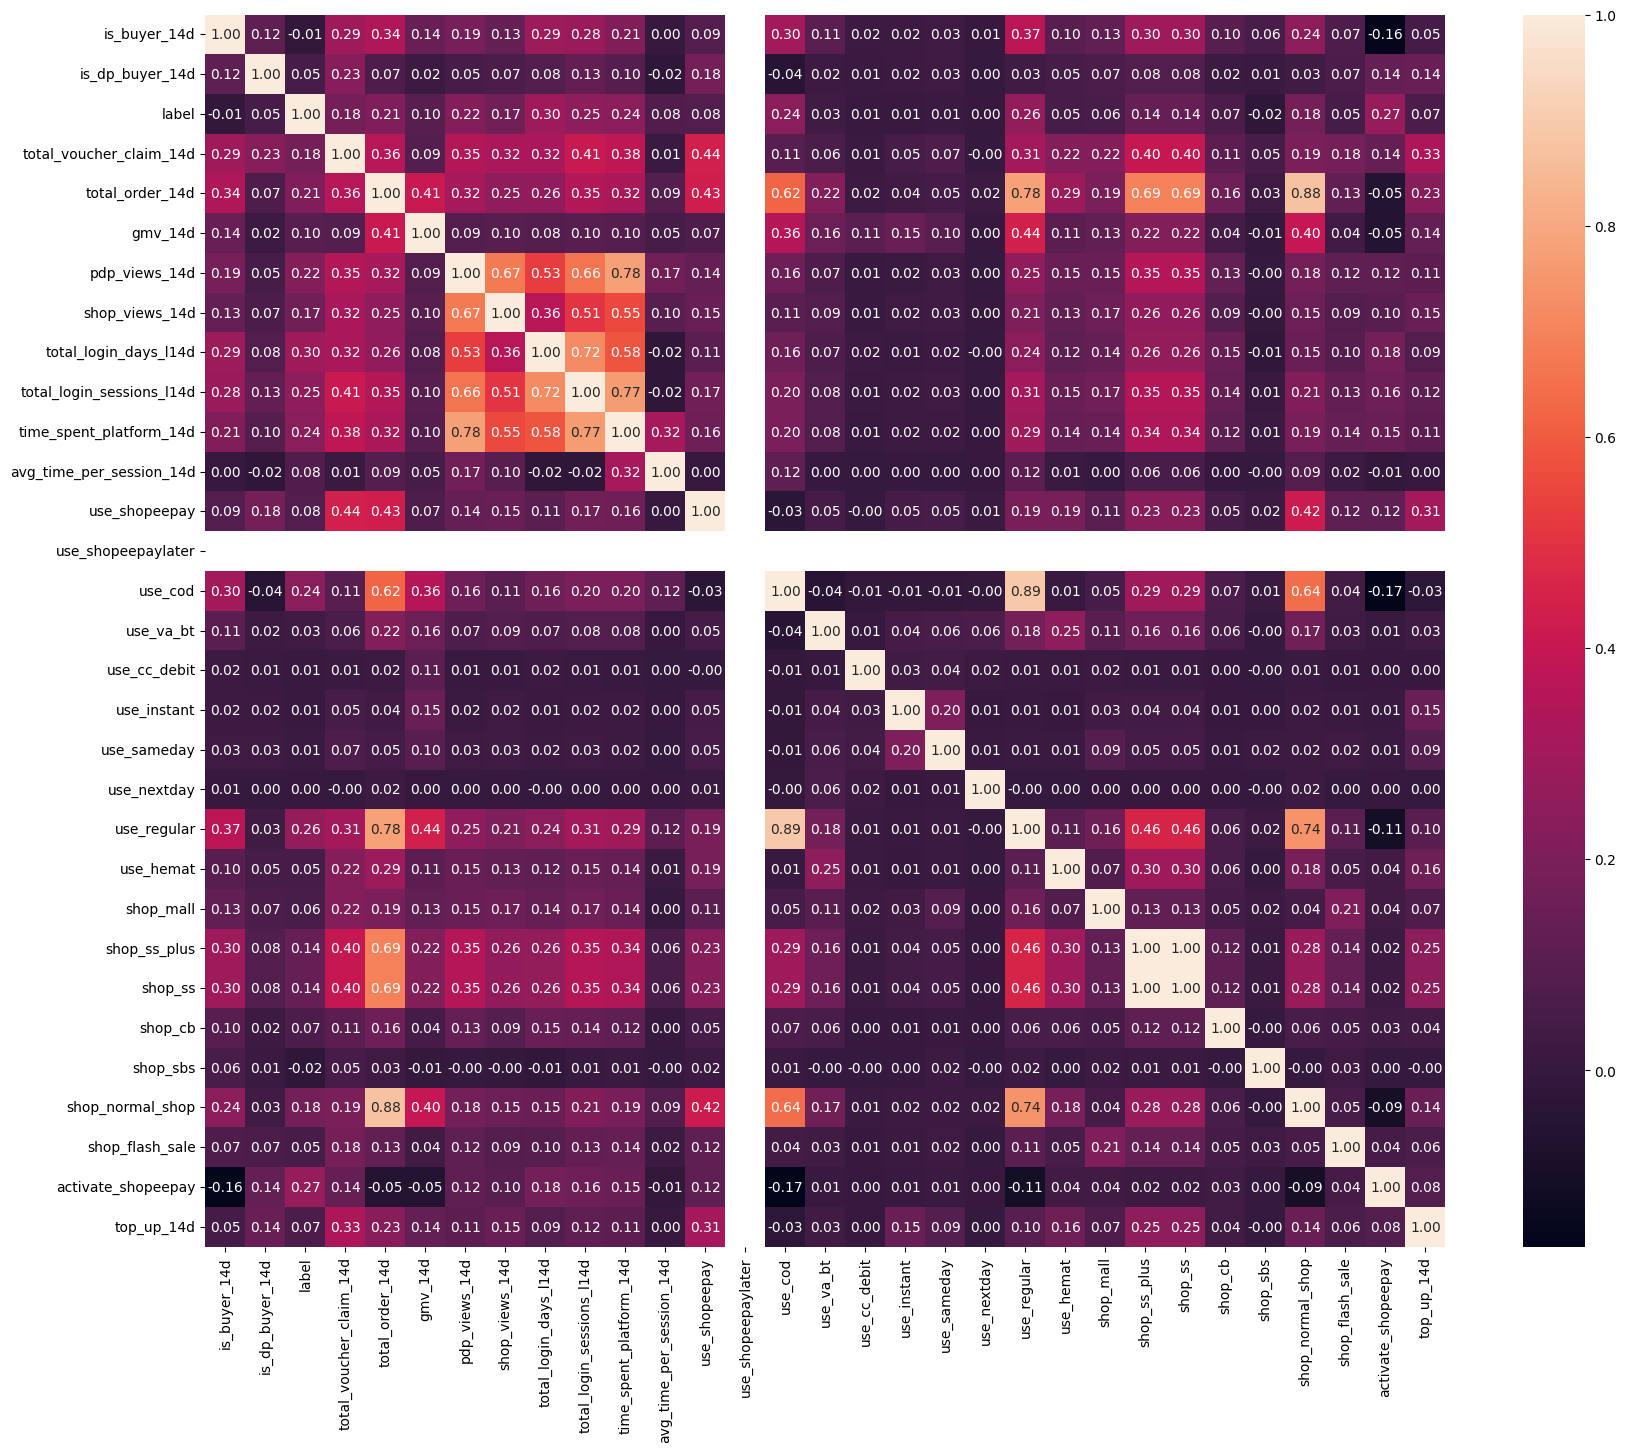

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.iloc[:, 3:34].corr(), annot=True, fmt=".2f")
plt.show()

activate_shopeepay has the strongest correlation for label

use_shopeepaylater is always empty (to be dropped)

# Remove Insignificant Features

In [ ]:
df = df.drop(['top_up_14d','use_shopeepaylater','user_id','regist_date'],axis=1)
df.head()

,age_group,is_buyer_14d,is_dp_buyer_14d,label,total_voucher_claim_14d,total_order_14d,gmv_14d,pdp_views_14d,shop_views_14d,total_login_days_l14d,total_login_sessions_l14d,time_spent_platform_14d,avg_time_per_session_14d,use_shopeepay,use_cod,use_va_bt,use_cc_debit,use_instant,use_sameday,use_nextday,use_regular,use_hemat,shop_mall,shop_ss_plus,shop_ss,shop_cb,shop_sbs,shop_normal_shop,shop_flash_sale,activate_shopeepay,gender_Female,gender_Male,gender_Unknown,region_Jabodetabek,region_Java non Jabodetabek,region_Non Java,is_rural_or_urban_RURAL,is_rural_or_urban_URBAN,new_buyer_initiative_Affiliate,new_buyer_initiative_COD,"new_buyer_initiative_COD Rp1,000",new_buyer_initiative_Cashback,new_buyer_initiative_Direct Discount,new_buyer_initiative_FS0,new_buyer_initiative_FS0 Instant,new_buyer_initiative_FSV,new_buyer_initiative_Flash Sale,new_buyer_initiative_Free Coin,new_buyer_initiative_Free Money,new_buyer_initiative_Jambore,new_buyer_initiative_Murah Lebay,new_buyer_initiative_NUG - Alfamart,new_buyer_initiative_NUG - Emas,new_buyer_initiative_NUG - Free Fire,new_buyer_initiative_NUG - Others,new_buyer_initiative_NUG - PG,new_buyer_initiative_NUG - PLN,new_buyer_initiative_NUG - Pulsa,new_buyer_initiative_No KSP,new_buyer_initiative_Partner Voucher,new_buyer_initiative_Referral,new_buyer_initiative_SPL Lite,new_buyer_initiative_SPay - Offline - Enterprise,new_buyer_initiative_SPay - Offline - Micro,new_buyer_initiative_SPay - Offline - Others,new_buyer_initiative_SPay - Offline - SMB,new_buyer_initiative_SPay - Online - 3rd Party,new_buyer_initiative_SPay - Online - Garena,new_buyer_initiative_SPay - Online - Google Play,new_buyer_initiative_Serba Seribu - Checkout 1k,new_buyer_initiative_Serba Seribu - Flash Sale 1k,new_buyer_initiative_Serba Seribu - Price Point Collection,new_buyer_initiative_Shopee Dari Rumah,new_buyer_initiative_Shopee Food - NUZ,new_buyer_initiative_Shopee Food - Organic,new_buyer_initiative_Shopee Food - Savings Pass,new_buyer_initiative_Snack Video - Existing User,new_buyer_initiative_Snack Video - New User,new_buyer_initiative_Social Seller
0,0,0,0,0,0.0,0.0,0.0,36.0,0.0,3,5.0,1325.322,265.064400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,0,0,0,0.0,0.0,0.0,4.0,0.0,4,4.0,2633.400,658.350000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,0,0,0,0.0,0.0,0.0,77.0,0.0,3,3.0,3305.075,1101.691667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,0,0,0,0.0,0.0,0.0,7.0,0.0,1,1.0,700.040,700.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0,0,0,0,0.0,0.0,0.0,77.0,9.0,8,28.0,6228.460,222.445000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False

#Outlier Handling Using Z-Test

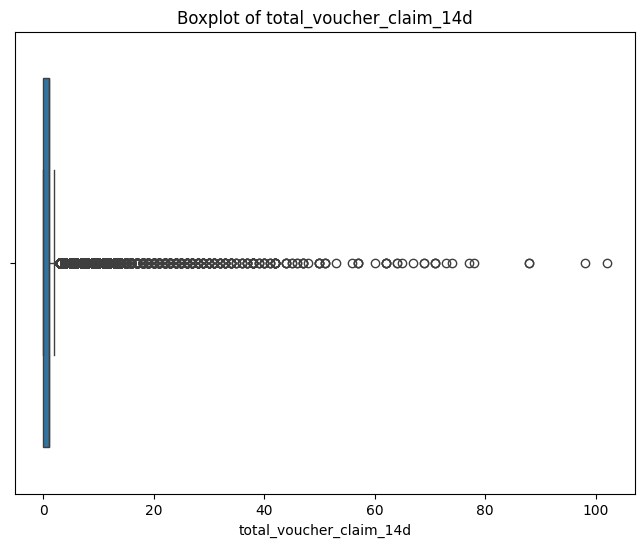

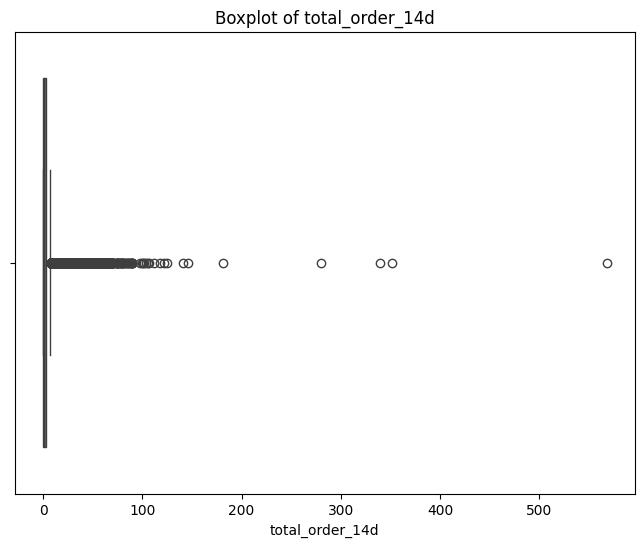

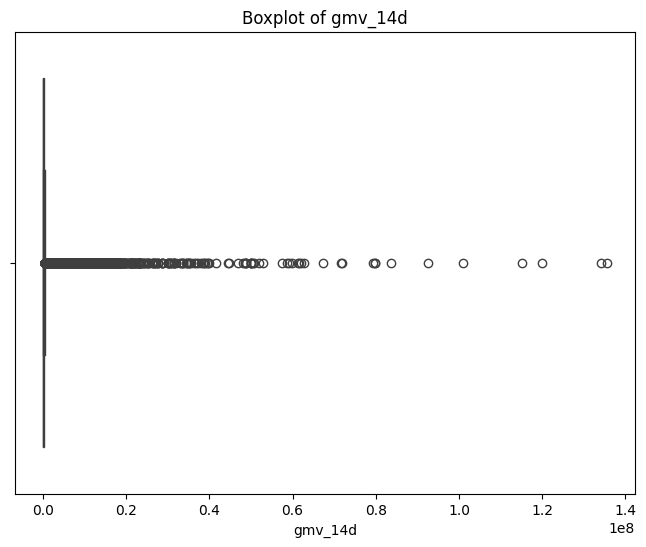

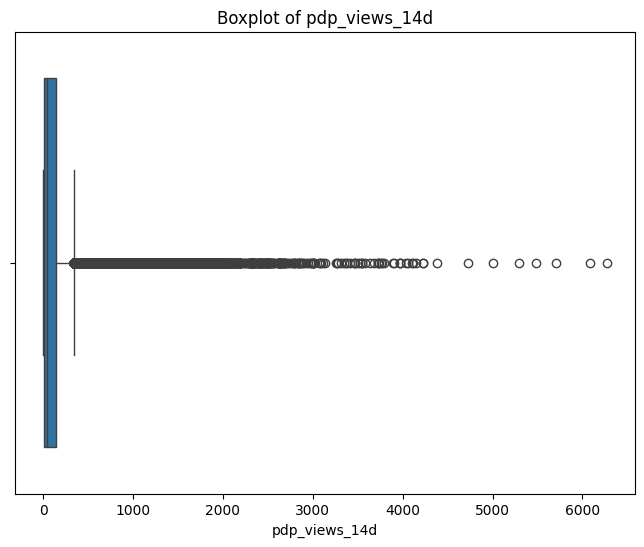

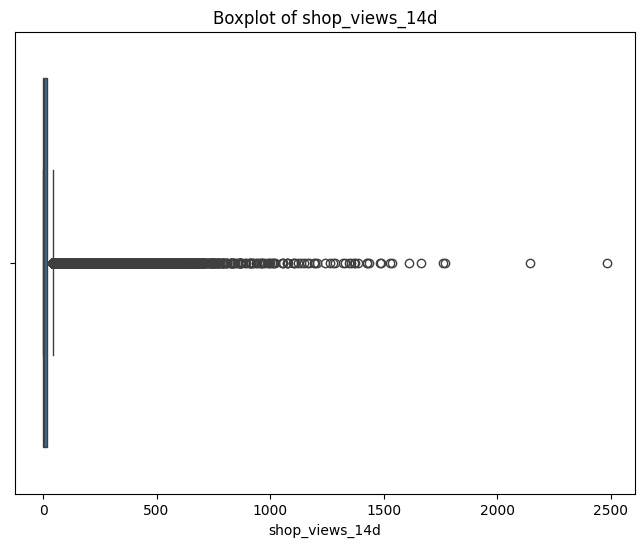

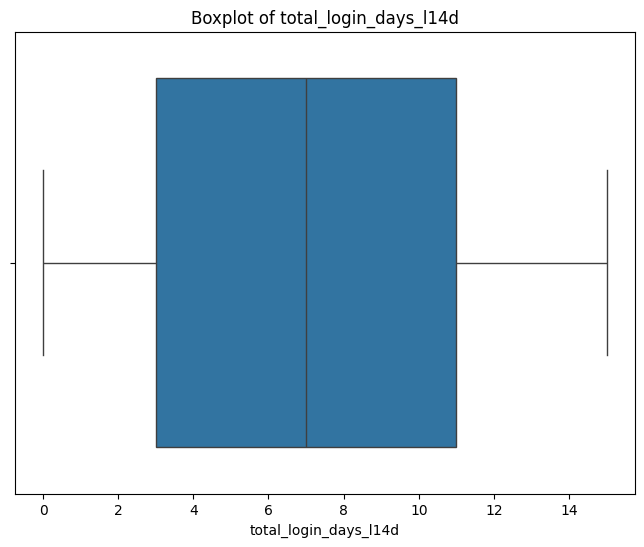

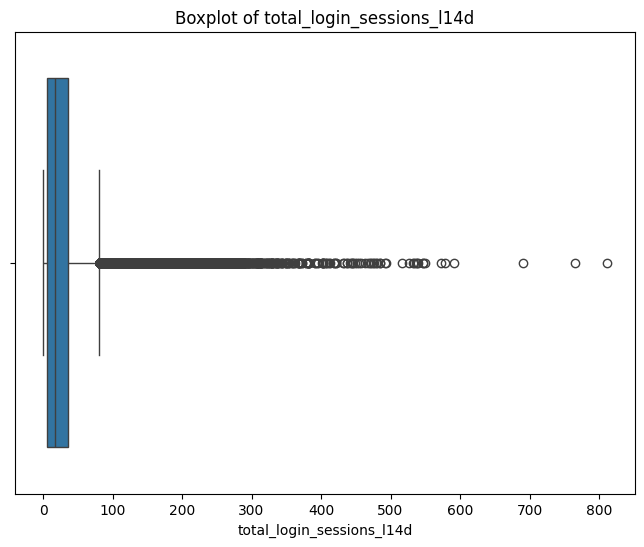

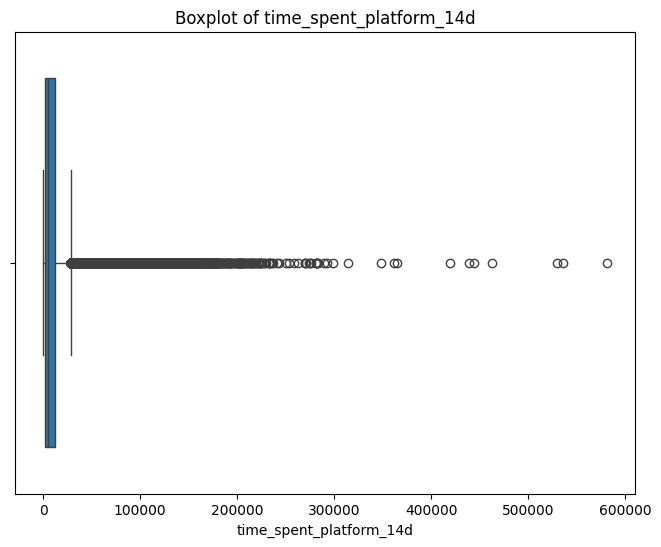

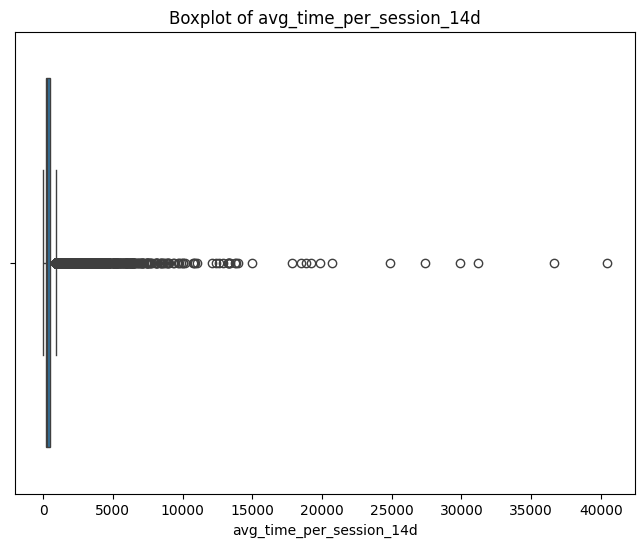

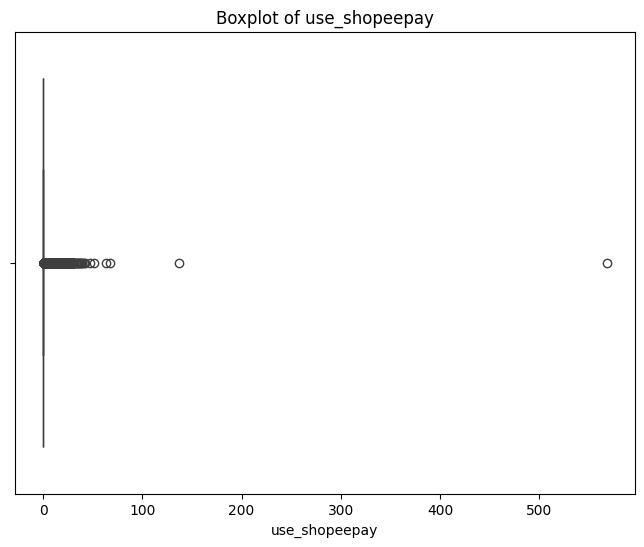

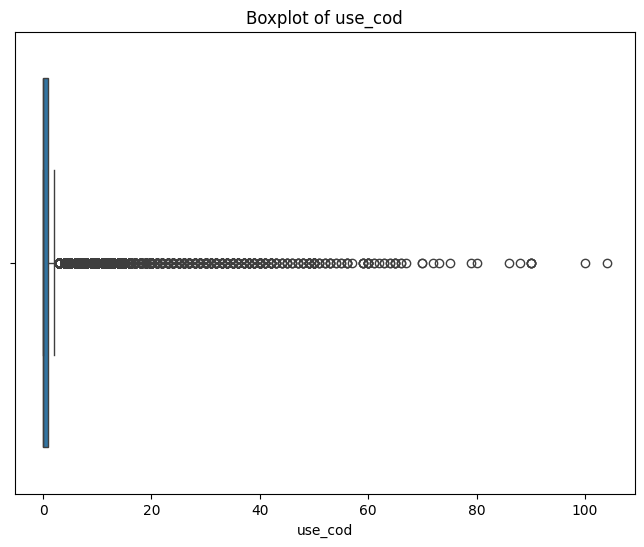

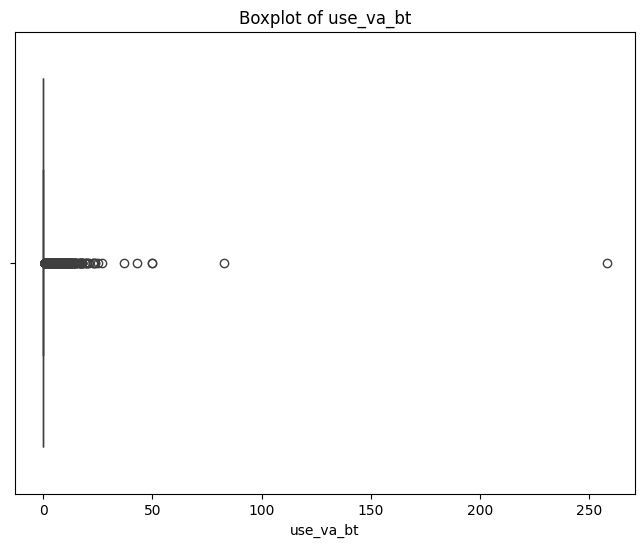

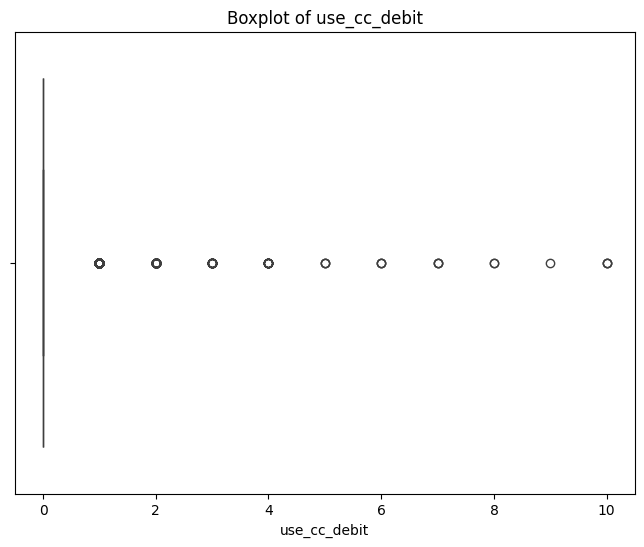

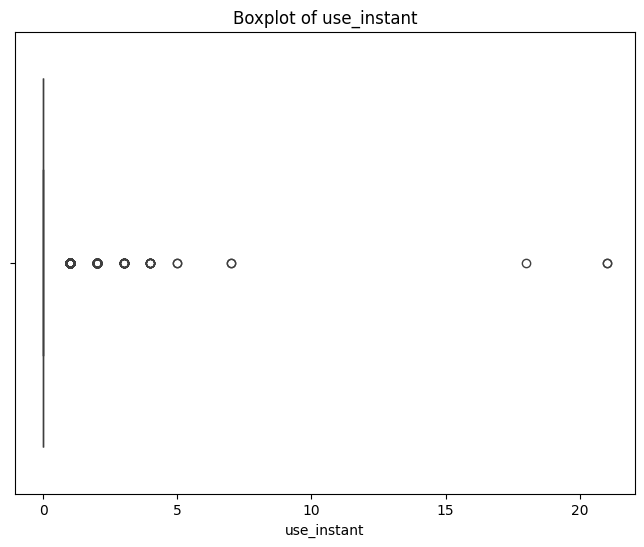

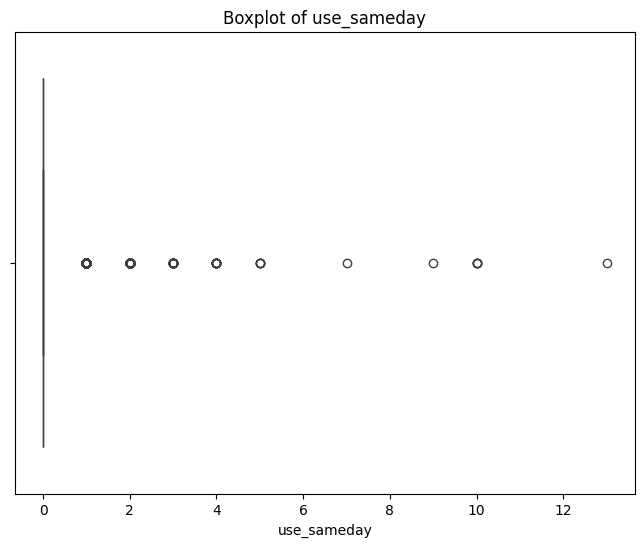

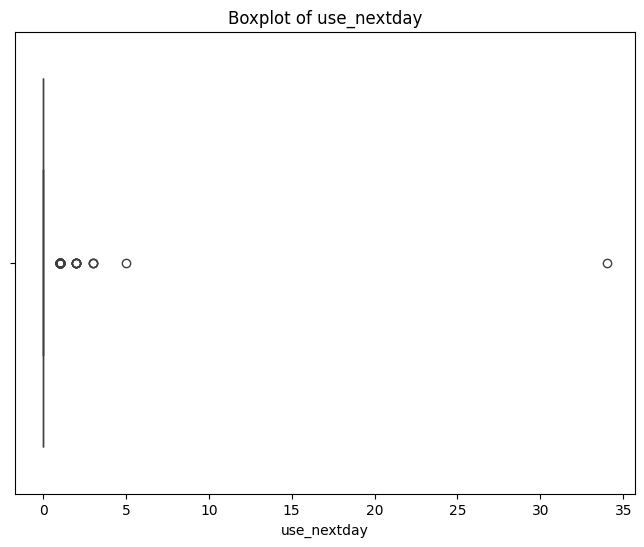

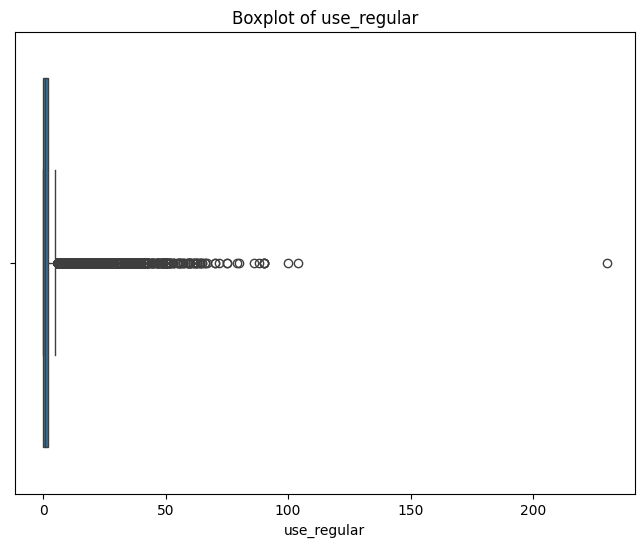

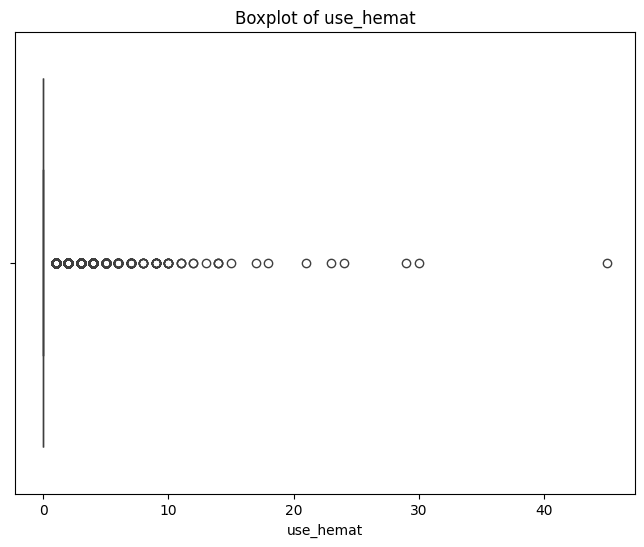

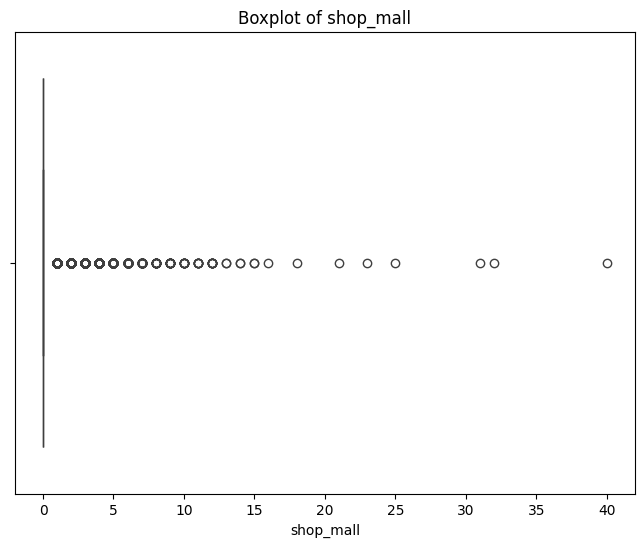

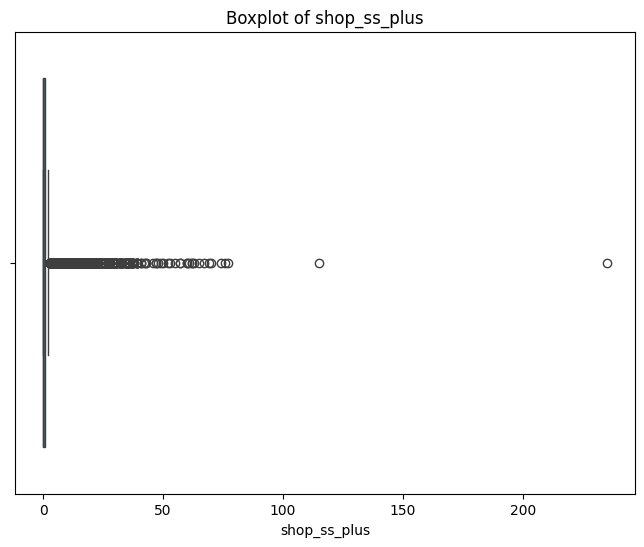

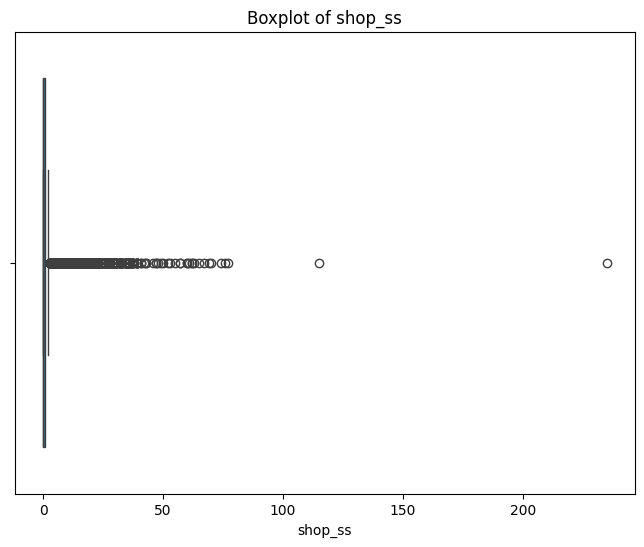

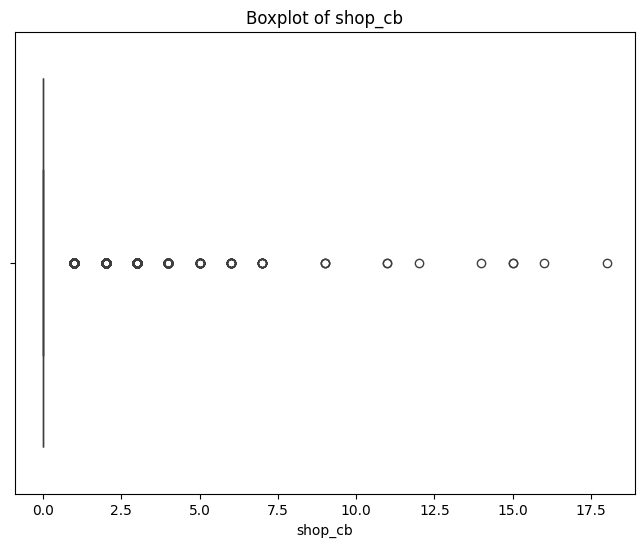

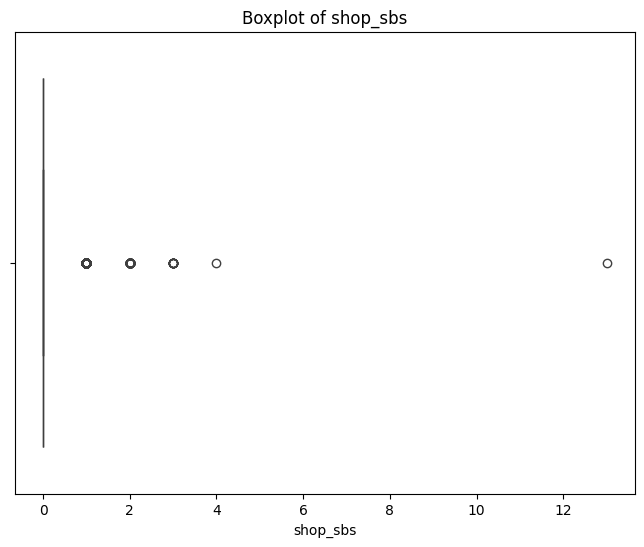

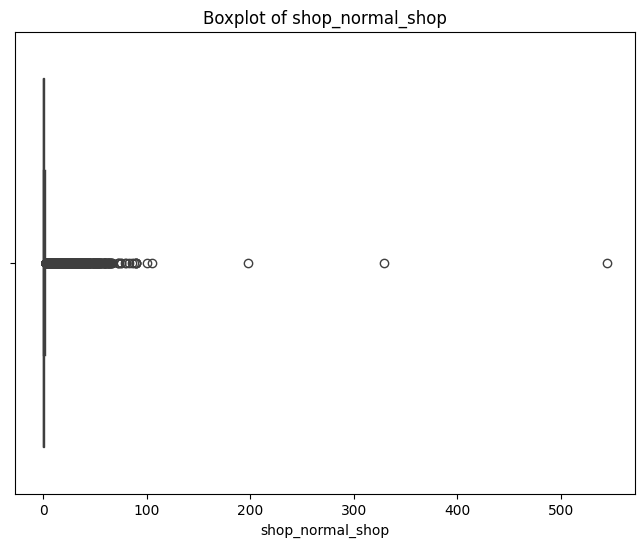

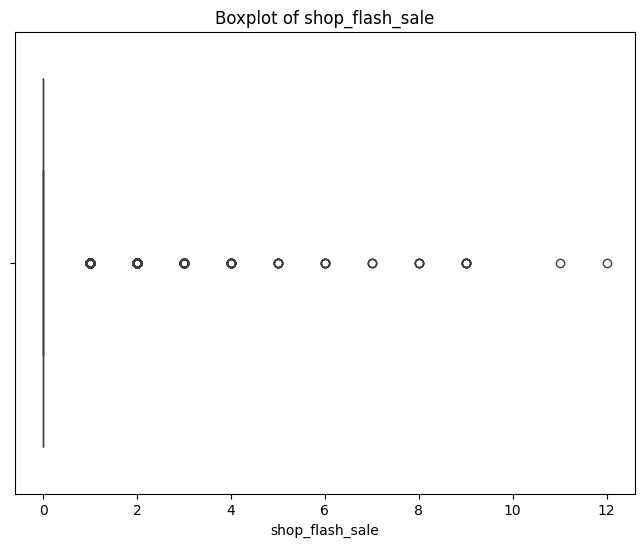

In [ ]:
num_features = df.iloc[:, 4:29].columns
for col in num_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

Very skewed due to lots of zeroes

In [ ]:
df[num_features].describe()

,total_voucher_claim_14d,total_order_14d,gmv_14d,pdp_views_14d,shop_views_14d,total_login_days_l14d,total_login_sessions_l14d,time_spent_platform_14d,avg_time_per_session_14d,use_shopeepay,use_cod,use_va_bt,use_cc_debit,use_instant,use_sameday,use_nextday,use_regular,use_hemat,shop_mall,shop_ss_plus,shop_ss,shop_cb,shop_sbs,shop_normal_shop,shop_flash_sale
count,222000.000000,222000.000000,2.220000e+05,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000
mean,1.171788,2.354851,3.056661e+05,122.124063,20.723491,6.979622,27.691964,10328.385970,383.410916,0.225000,1.417680,0.142730,0.002586,0.003194,0.004333,0.000599,1.832329,0.061937,0.088122,0.964590,0.964590,0.041108,0.008883,1.252149,0.019113
std,2.231453,4.526280,1.376841e+06,210.490320,53.824236,4.310234,33.704195,16104.269563,413.281799,1.686422,3.057451,0.861766,0.087367,0.102640,0.098407,0.076727,3.248766,0.392558,0.450132,2.118087,2.118087,0.269224,0.102282,3.340665,0.177266
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,12.000000,0.000000,3.000000,6.000000,1675.884000,187.107478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,5.700000e+04,48.000000,4.000000,7.000000,17.000000,4934.988500,301.293431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,2.197850e+05,144.000000,18.000000,11.000000,36.000000,12395.313500,472.664834,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,102.000000,568.000000,1.355221e+08,6270.000000,2483.000000,15.000000,811.000000,581004.506000,40414.410636,568.000000,104.000000,258.000000,10.000000,21.000000,13.000000,34.000000,230.000000,45.000000,40.000000,235.000000,235.000000,18.000000,13.000000,544.000000,12.000000


In [ ]:
df_filtered = df.copy()

for feature in num_features:
  upper_limit = df_filtered[feature].quantile(0.99)
  df_filtered[feature] = np.where(df_filtered[feature] > upper_limit, upper_limit, df_filtered[feature])


In [ ]:
df_filtered[num_features].describe()

,total_voucher_claim_14d,total_order_14d,gmv_14d,pdp_views_14d,shop_views_14d,total_login_days_l14d,total_login_sessions_l14d,time_spent_platform_14d,avg_time_per_session_14d,use_shopeepay,use_cod,use_va_bt,use_cc_debit,use_instant,use_sameday,use_nextday,use_regular,use_hemat,shop_mall,shop_ss_plus,shop_ss,shop_cb,shop_sbs,shop_normal_shop,shop_flash_sale
count,222000.000000,222000.000000,2.220000e+05,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.0,222000.0,222000.0,222000.0,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.000000,222000.0,222000.000000,222000.000000
mean,1.112275,2.239550,2.560863e+05,117.665815,19.172820,6.979622,27.155189,9983.566253,372.386919,0.182797,1.324874,0.125401,0.0,0.0,0.0,0.0,1.744680,0.053369,0.076973,0.912288,0.912288,0.031905,0.0,1.156964,0.015770
std,1.654896,3.285829,5.625628e+05,177.511745,39.642312,4.310234,30.454143,13590.220239,276.732299,0.708403,2.333023,0.451455,0.0,0.0,0.0,0.0,2.531059,0.267250,0.316404,1.598967,1.598967,0.175749,0.0,2.253157,0.124586
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,12.000000,0.000000,3.000000,6.000000,1675.884000,187.107478,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,1.000000,5.700000e+04,48.000000,4.000000,7.000000,17.000000,4934.988500,301.293431,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.000000,3.000000,2.197850e+05,144.000000,18.000000,11.000000,36.000000,12395.313500,472.664834,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,1.000000,0.000000
max,10.000000,19.000000,3.595070e+06,995.000000,245.000000,15.000000,158.000000,75960.878100,1602.310070,5.000000,11.000000,3.000000,0.0,0.0,0.0,0.0,13.000000,2.000000,2.000000,9.000000,9.000000,1.000000,0.0,12.000000,1.000000


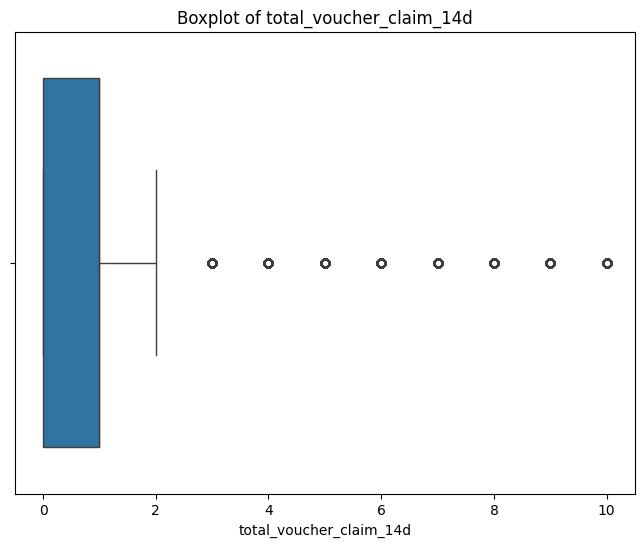

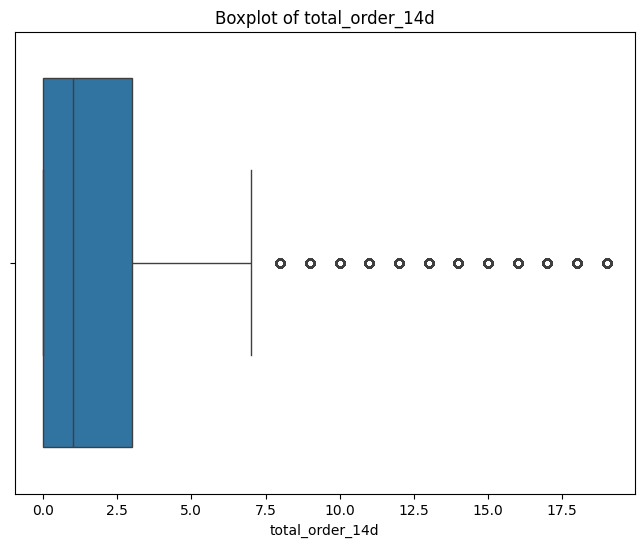

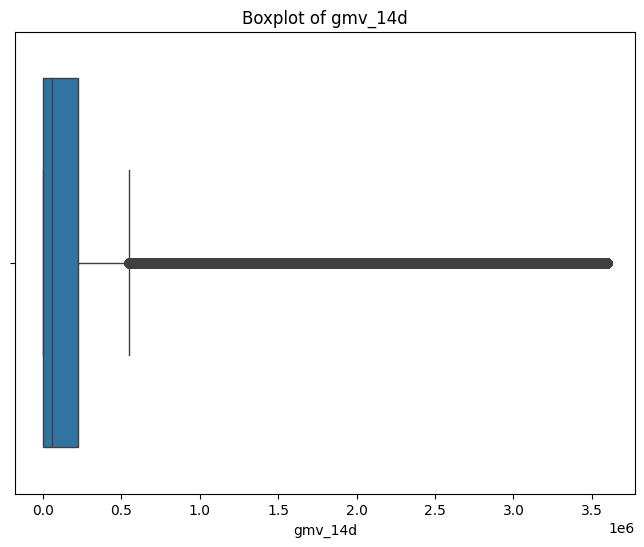

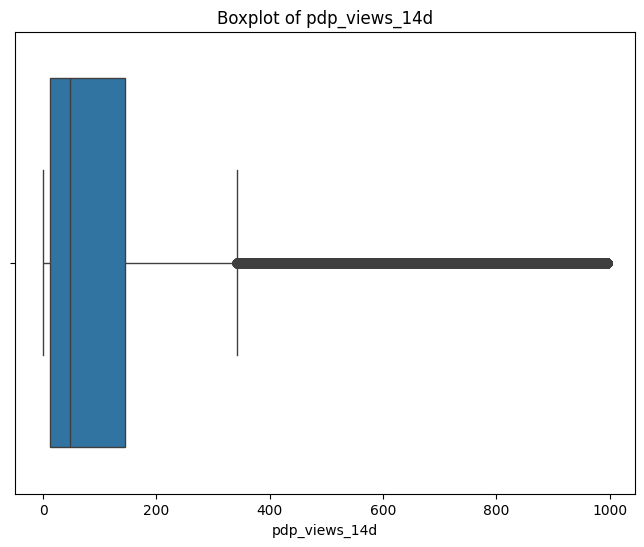

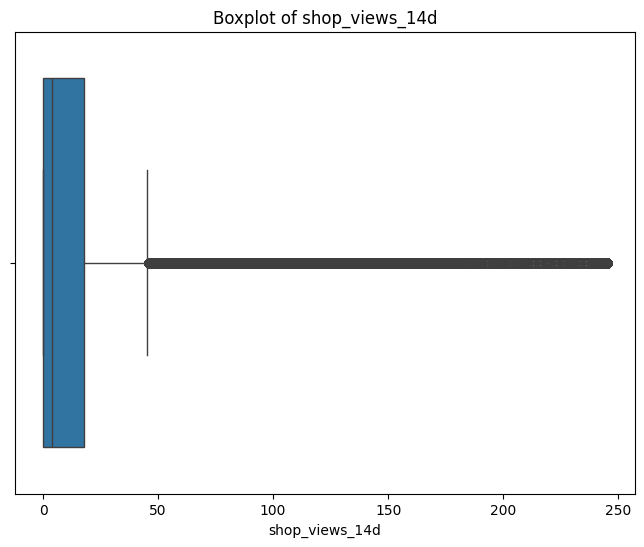

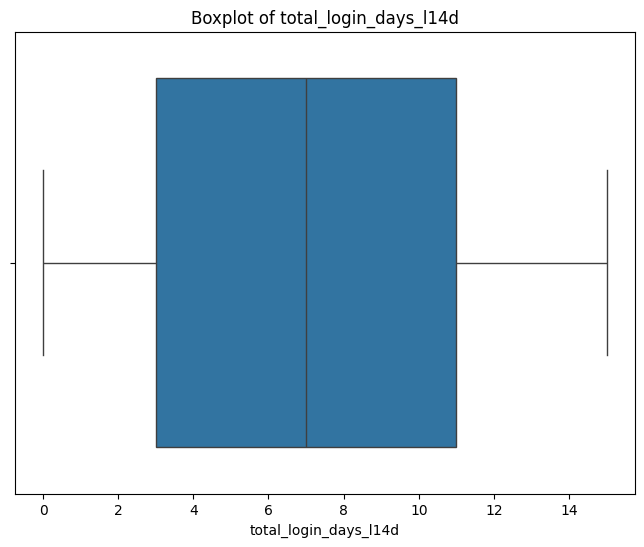

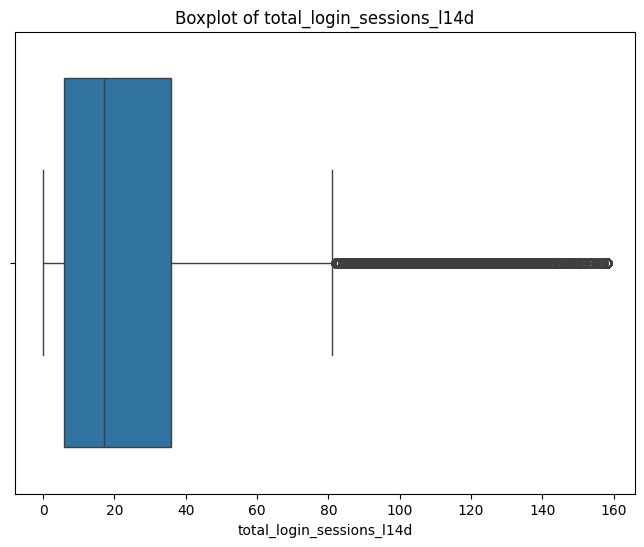

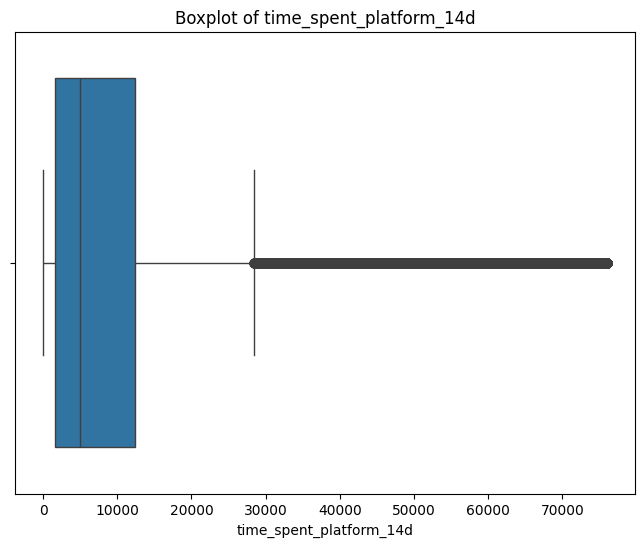

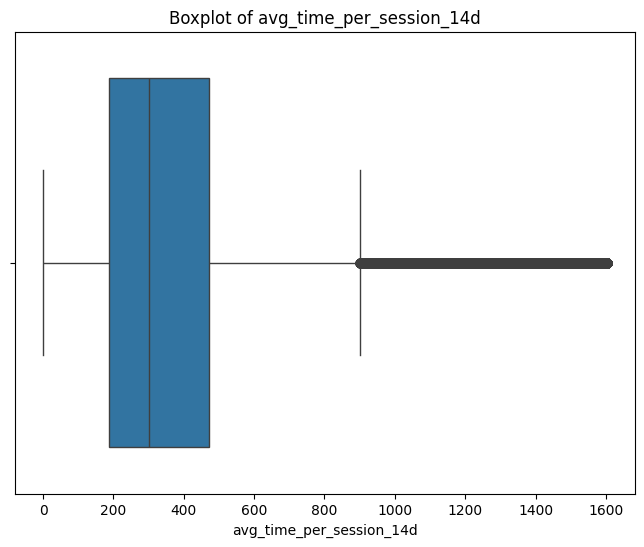

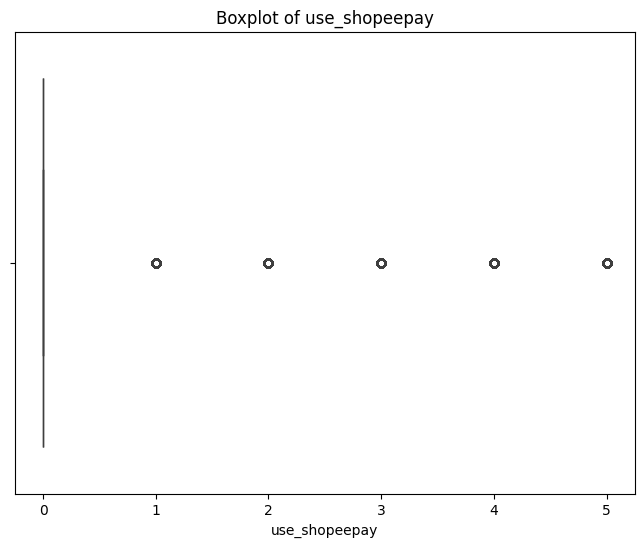

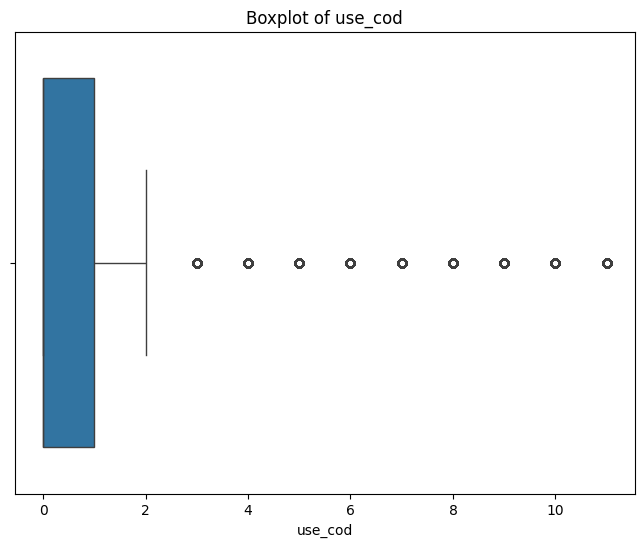

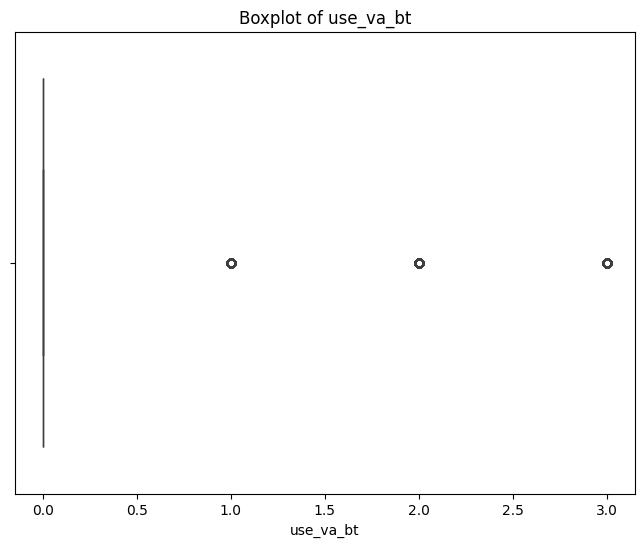

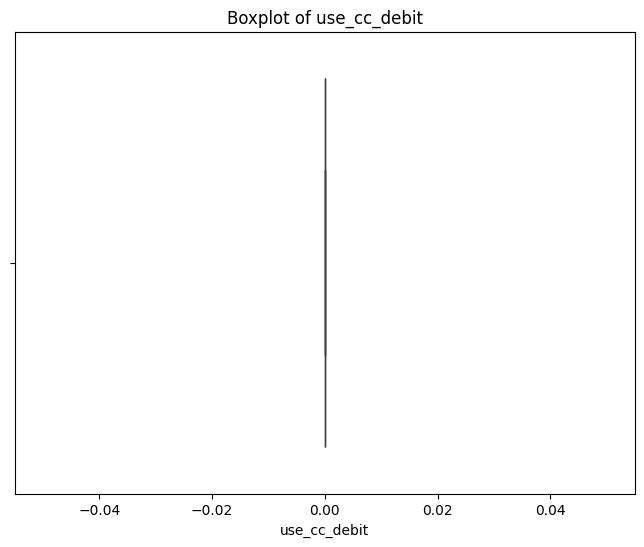

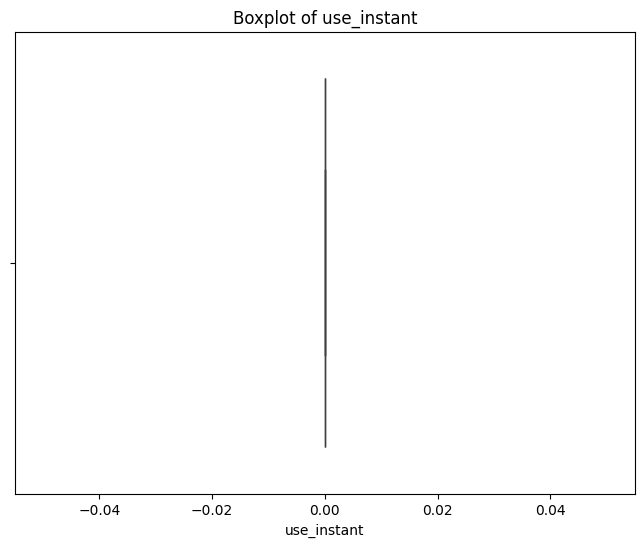

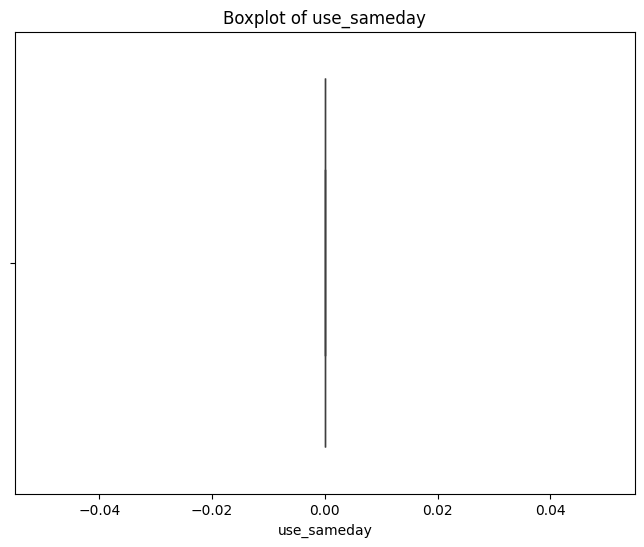

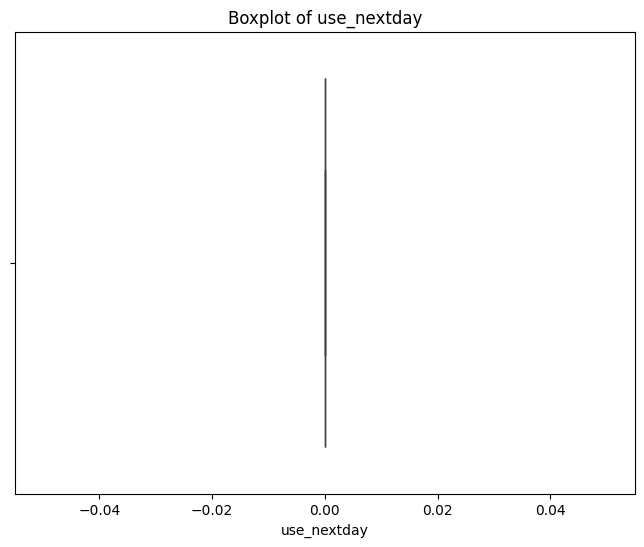

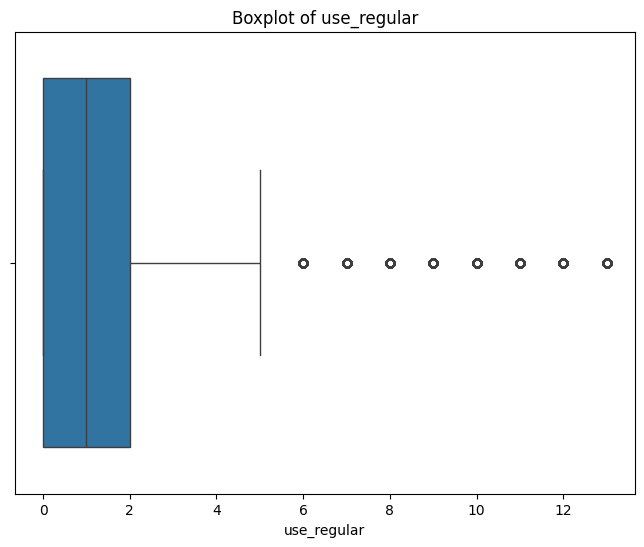

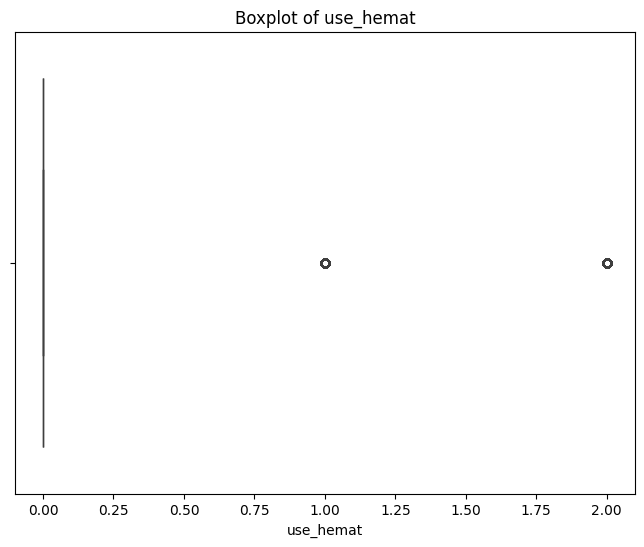

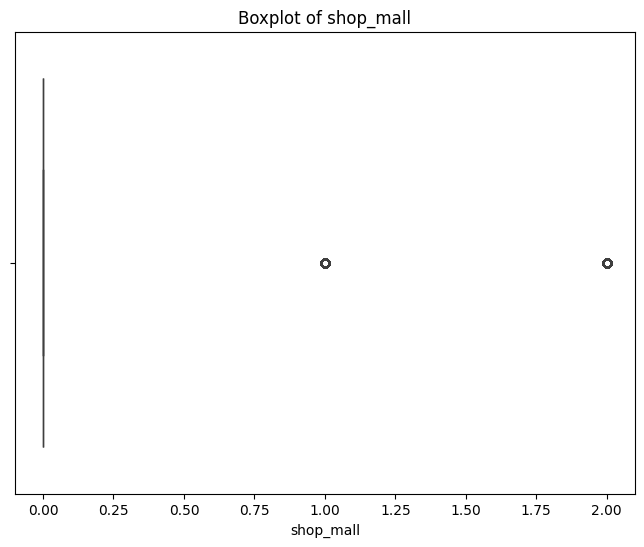

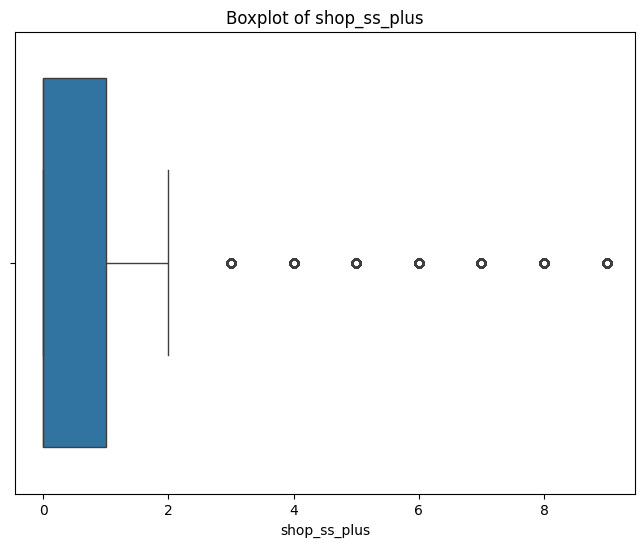

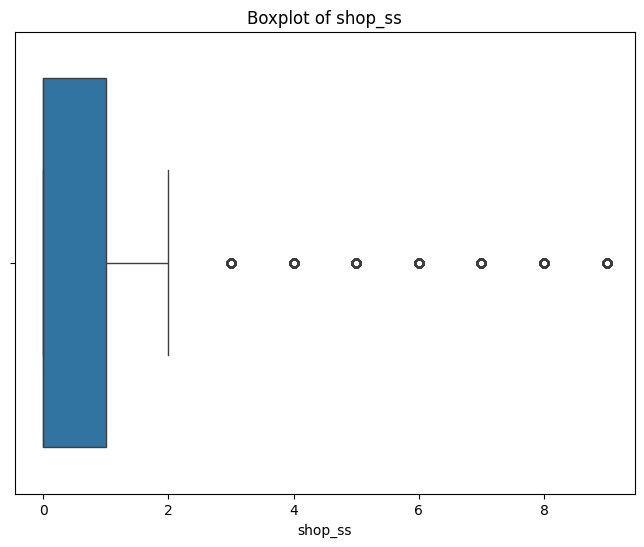

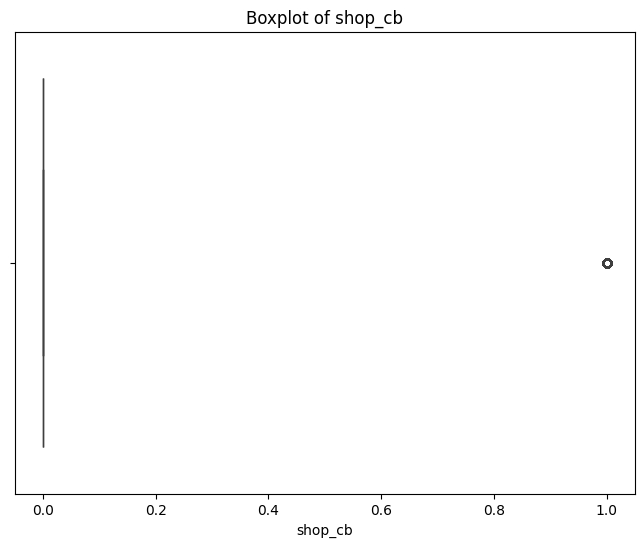

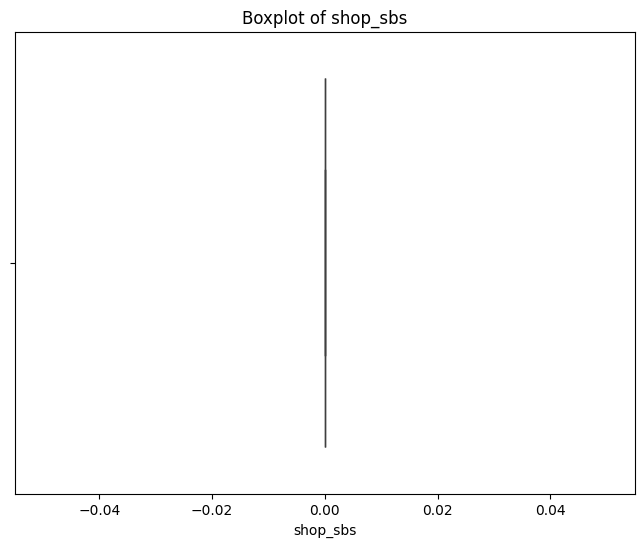

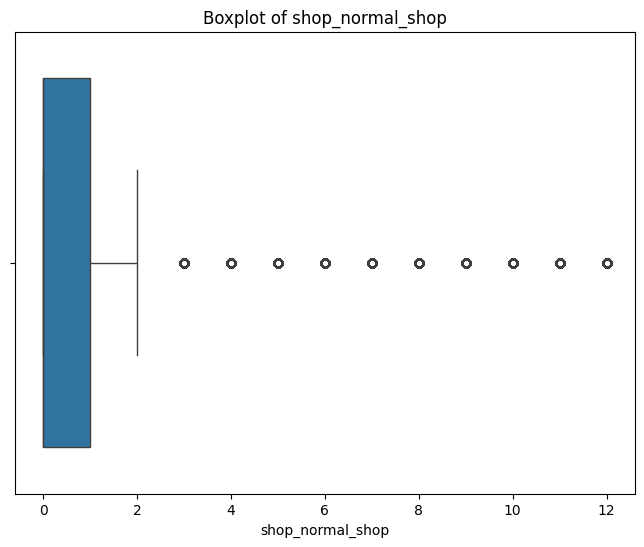

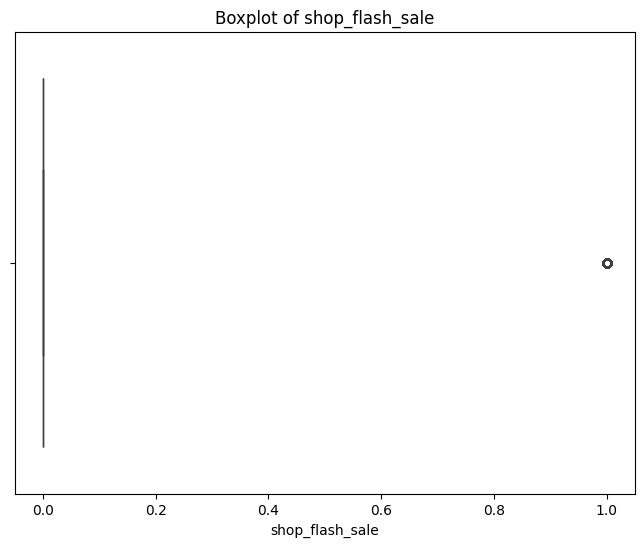

In [ ]:
for col in num_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df_filtered[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [ ]:
for col in num_features:
  if df_filtered[col].nunique() == 1:
    print(f'{col} has only one unique value')

use_cc_debit has only one unique value
use_instant has only one unique value
use_sameday has only one unique value
use_nextday has only one unique value
shop_sbs has only one unique value


Drop column that has no predictive power

In [ ]:
df = df.drop(['use_cc_debit','use_instant','use_sameday','use_nextday','shop_sbs'],axis=1)
df.head()

,age_group,is_buyer_14d,is_dp_buyer_14d,label,total_voucher_claim_14d,total_order_14d,gmv_14d,pdp_views_14d,shop_views_14d,total_login_days_l14d,total_login_sessions_l14d,time_spent_platform_14d,avg_time_per_session_14d,use_shopeepay,use_cod,use_va_bt,use_regular,use_hemat,shop_mall,shop_ss_plus,shop_ss,shop_cb,shop_normal_shop,shop_flash_sale,activate_shopeepay,gender_Female,gender_Male,gender_Unknown,region_Jabodetabek,region_Java non Jabodetabek,region_Non Java,is_rural_or_urban_RURAL,is_rural_or_urban_URBAN,new_buyer_initiative_Affiliate,new_buyer_initiative_COD,"new_buyer_initiative_COD Rp1,000",new_buyer_initiative_Cashback,new_buyer_initiative_Direct Discount,new_buyer_initiative_FS0,new_buyer_initiative_FS0 Instant,new_buyer_initiative_FSV,new_buyer_initiative_Flash Sale,new_buyer_initiative_Free Coin,new_buyer_initiative_Free Money,new_buyer_initiative_Jambore,new_buyer_initiative_Murah Lebay,new_buyer_initiative_NUG - Alfamart,new_buyer_initiative_NUG - Emas,new_buyer_initiative_NUG - Free Fire,new_buyer_initiative_NUG - Others,new_buyer_initiative_NUG - PG,new_buyer_initiative_NUG - PLN,new_buyer_initiative_NUG - Pulsa,new_buyer_initiative_No KSP,new_buyer_initiative_Partner Voucher,new_buyer_initiative_Referral,new_buyer_initiative_SPL Lite,new_buyer_initiative_SPay - Offline - Enterprise,new_buyer_initiative_SPay - Offline - Micro,new_buyer_initiative_SPay - Offline - Others,new_buyer_initiative_SPay - Offline - SMB,new_buyer_initiative_SPay - Online - 3rd Party,new_buyer_initiative_SPay - Online - Garena,new_buyer_initiative_SPay - Online - Google Play,new_buyer_initiative_Serba Seribu - Checkout 1k,new_buyer_initiative_Serba Seribu - Flash Sale 1k,new_buyer_initiative_Serba Seribu - Price Point Collection,new_buyer_initiative_Shopee Dari Rumah,new_buyer_initiative_Shopee Food - NUZ,new_buyer_initiative_Shopee Food - Organic,new_buyer_initiative_Shopee Food - Savings Pass,new_buyer_initiative_Snack Video - Existing User,new_buyer_initiative_Snack Video - New User,new_buyer_initiative_Social Seller
0,0,0,0,0,0.0,0.0,0.0,36.0,0.0,3,5.0,1325.322,265.064400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,0,0,0,0.0,0.0,0.0,4.0,0.0,4,4.0,2633.400,658.350000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,0,0,0,0.0,0.0,0.0,77.0,0.0,3,3.0,3305.075,1101.691667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,0,0,0,0.0,0.0,0.0,7.0,0.0,1,1.0,700.040,700.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0,0,0,0,0.0,0.0,0.0,77.0,9.0,8,28.0,6228.460,222.445000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [ ]:
df_filtered['label'].value_counts(normalize=True)


,proportion
label,
0,0.548378
1,0.451622


No Significant Class Imbalance

# Modelling

I chose Logistic Regression, Random Forest, and XGBoost together to balance interpretability, baseline performance, and the ability to capture complex patterns in the data.

## Data Split

In [ ]:
from sklearn.model_selection import train_test_split
X = df_filtered.drop(['label'], axis=1)
y = df_filtered['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

Accuracy: 0.63
Precision: 0.60
Recall: 0.54
F1 Score: 0.57


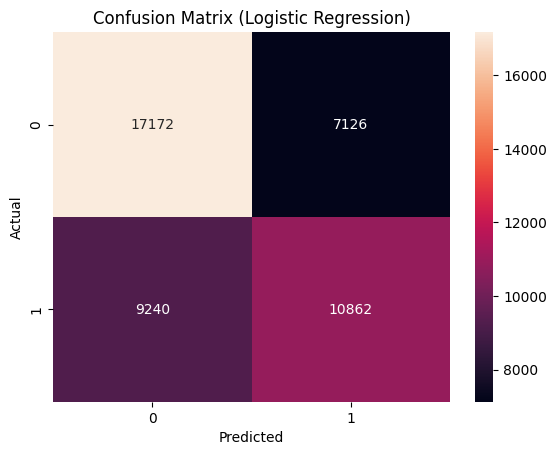

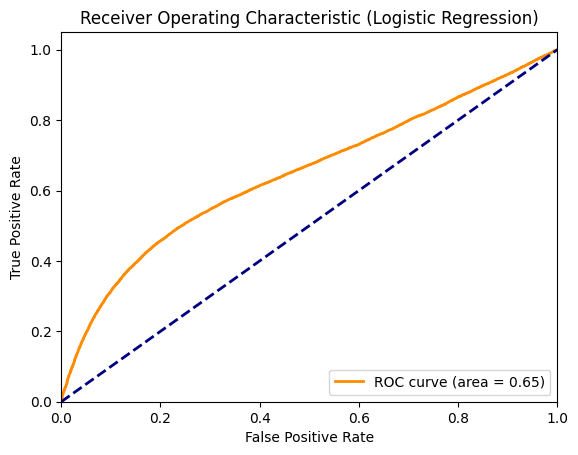

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, roc_curve, auc

#Train the Logistic Regression Model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

# Calculate and print all the metrics
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot the confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Calculate and plot the ROC curve
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()


## Random Forest

Accuracy: 0.73
Precision: 0.71
Recall: 0.69
F1 Score: 0.70


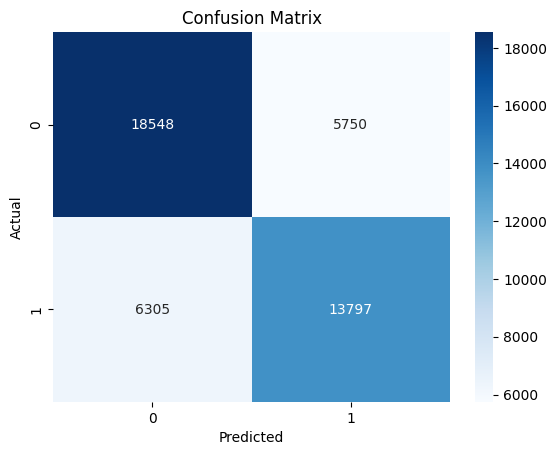

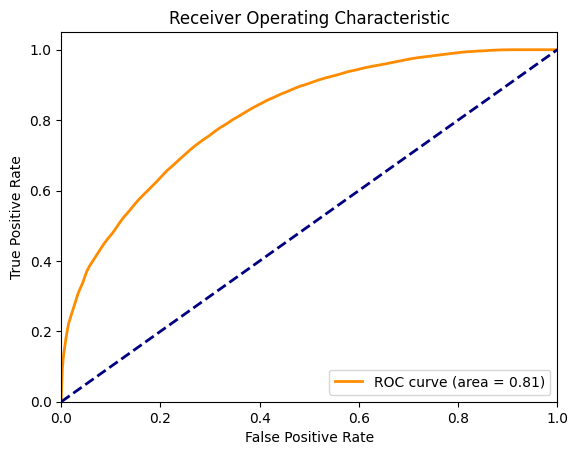

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Calculate and print all the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Calculate and plot the ROC curve
y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## XGBoost

Accuracy: 0.74
Precision: 0.71
Recall: 0.70
F1 Score: 0.71


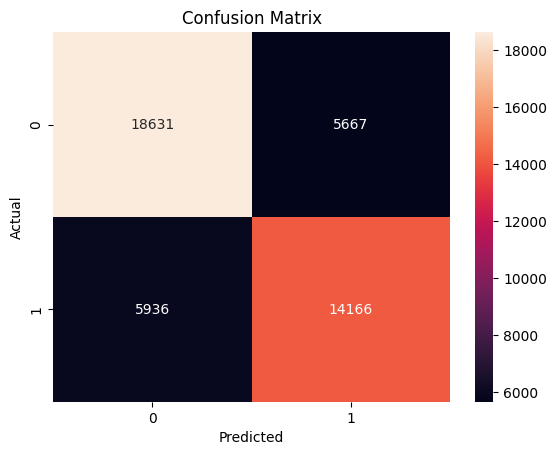

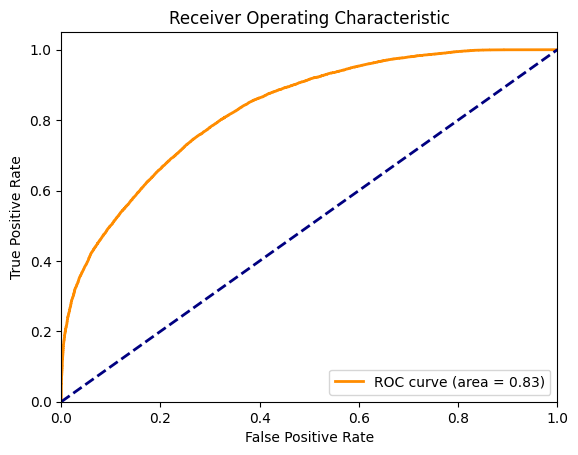

In [ ]:
from xgboost import XGBClassifier

#Train the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Calculate and print all the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Calculate and plot the ROC curve
y_prob = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
!pip install bayesian-optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='recall')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best recall found: ", grid_search.best_score_)


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}
Best accuracy found:  0.7043838551765536


^supposed to be recall but due to time limitation cant be ran again

## Feature Importance

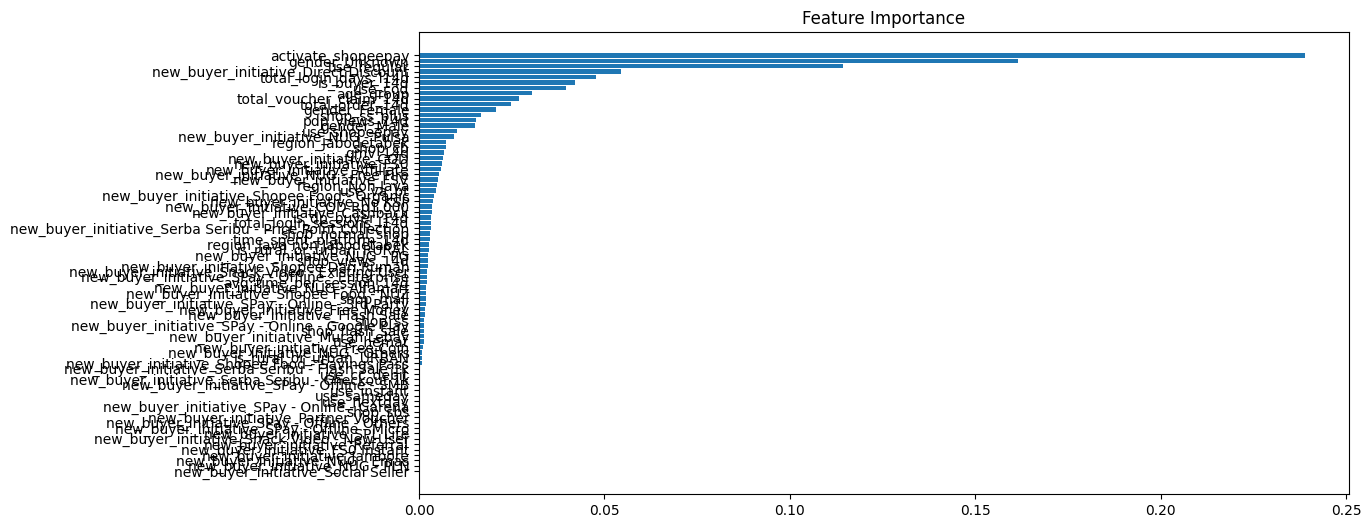

In [ ]:
feature_importance = grid_search.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

In [ ]:
top_10_indices = sorted_idx[-10:]
top_10_features = np.array(X_test.columns)[top_10_indices]
for i in range(9,-1,-1):
  feature_index = top_10_indices[i]
  print(f"{X_test.columns[feature_index]}: {feature_importance[feature_index]:.4f}")

activate_shopeepay: 0.2388
gender_Unknown: 0.1615
use_regular: 0.1143
new_buyer_initiative_Direct Discount: 0.0545
total_login_days_l14d: 0.0478
is_buyer_14d: 0.0420
use_cod: 0.0397
age_group: 0.0303
total_voucher_claim_14d: 0.0269
total_order_14d: 0.0249


Recall is more important because it focuses on the ability to correctly identify all the customers who are at risk of churning(ideally wants low false negative and lost customer is lost profit)